# Step 2.3 Algorithms and Data Structures - (Appendix - datetime objects)

### Questions:
1. __[所有python variable 都是某实际对象的reference ======> sys.getsizeof() ====> reference的大小？？还是实际object的大小？？](https://www.quora.com/How-much-memory-taken-by-variables-in-python)__
    
    * 1.1 __[Python 内存管理: id(a)==> integer; hex(id(a))==> 十六进制](http://www.cnblogs.com/vamei/p/3232088.html)__
    * 1.2 __[python 对象地址学习： id(obj)==>identity; hex(id(obj))==> memory address](https://blog.csdn.net/heipark_/article/details/48369467)__
    * __"is"__ keywords: a is b
2. __[measure real size of any python object](https://goshippo.com/blog/measure-real-size-any-python-object/)__
    * a = 10, sys.getsizeof(a)
    * b=[a], sys.getsizeof(b) ===> only return the size of the list container, not including the size of its elements, a
    * Using __sys.getsizeof__ on python object (including dictionary) may not be exact since it does not count __referenced objects__.
3. __[understand how much memory your python objects use](https://code.tutsplus.com/tutorials/understand-how-much-memory-your-python-objects-use--cms-25609)__
    * sys.getsizeof() only does a shallow measure!! 
    * for instance: sys.getsizeof(list): only the memory of the list and the pointers to its objects.
    * user-defined - deep_getsizeof(): Drills down __recursively__ and calculates the actual memory usage of a Python object graph
       
4. __[id() - memory 是十进制吗 - not memory address, just an unique identifier in integer](https://groups.google.com/forum/#!topic/comp.lang.python/LdQIdn1DGa4)__
5. __[understanding python variables as pointers](http://scottlobdell.me/2013/08/understanding-python-variables-as-pointers/)__

6. __[Data model in Python](https://docs.python.org/3/reference/datamodel.html)__
    * every obect has an __identity, a type and a value__ (3 fundamental elements)
        * __Identity__: never changes once an object has been created
            * is: operator 'is' compares the identity of two objects
            * id(): id() function returns an integer representing its identity --- for CPython, id(x) is the memory address
        * __Type__: object's type is unchangeable
            * type(): return an object's type, which is an object itself
        * __Value__: the value of some objects can change
            * mutable: dictionart, list
            * immutable: number, string, tuple
            
7. Distributed Computation Hash Table
    * how to combile hash table easily
    * No duplicated keys in hash table?
            

### Contents
1. Processing Tasks With Stacks And Queues
    
    Learn how to process tasks in the right order with stacks and queues while working with driver's license application data
        * How to implement a stack in Python
        * How to implement a queue in Python
        * How to profile stacks and queues
    
2. Effectively Using Arrays And List
    
    Learn how to utilize arrays and lists to process stick price data more effectively
        * How to sort an array using selection sort
        * how to sort an array using bubble sort
        * How to profile both sorting algorithms

3. Sorting Arrays And Lists (Sorting Algorithms  --- list.sort(); sorted())

    Learn how to sort arrays and lists, and the tradeoffs invovled
    * __[python sorting howto](https://docs.python.org/3/howto/sorting.html)__
        * Selection Sort: For Loop ===> For Loop
        * Bubble Sort: While Loop ===> For Loop
        * Insertion Sort: For Loop ===> While Loop
        * All are O(n^2)
        * Generally, Insertion > Selection > Bubble
        * Foundation: Swap function

4. Searching Arrays And Lists (Searching Algorithms --- list.index())

    Learn how to search for values in arrays and lists
    * __[Python Builtin Binary Search Algorithm ===> bisect](https://docs.python.org/3/library/bisect.html)__
        * The difference between linear and binary search
        * How to profile search algorithms

5. Hash Tables

    Learn about hash tables, a versatile data structure with fast lookup and insertion times
        * How a hash table and hash functions work
        * How to implement a hash table in Python
        * How to profile hash tables
    
6. Guided Project: Analyzing Stock Prices

    Use the correct data structures to analyze stock prices efficiently
        * Using hash tables to compute aggregates
        * Implementing search algorithms
        

    

## 1. Processing Tasks With Stacks And Queses

### 1.1 Assigning Tasks to Pools

In the last course, we talked about the idea of worker pools. We used assigning documents to translators as an example. You have a "pool" of several translators who are waiting for work. As the work comes in, it gets assigned to free translators, who then complete the translation work. This model works well when you have a fixed amount of work, or when you have more translators than available work. Here's an example with a fixed amount of work:

![img alt](https://s3.amazonaws.com/dq-content/168/translators_2.svg)

But what happens when work is constantly coming in? Let's say that you're writing some code for the Department Of Motor Vehicles, or DMV, in California. If you're unfamiliar, the DMV in America handles driver's license issuances and renewals. In order to apply for a driver's license, you need quite a bit of information, including:

* Your name
* Your address
* __[Your Social Security Number](https://en.wikipedia.org/wiki/Social_Security_number)__

A single DMV office is usually open between 9am and 5pm. During these hours, people come in, and give their application information to clerks. These clerks then collate the application information and file it for further processing. After the processing is done, the license is able to be printed and given to the applicant.

Let's say that the code you're writing needs to handle this further processing, and your system can handle processing 200 applications per hour. Throughout the day, the DMV handles a variable number of visitors:

![img alt](https://s3.amazonaws.com/dq-content/172/visitors_during_day_1.svg)


As you can see, there are times during the day when you're below processing capacity (green), times when you're at capacity (blue) and times when you're above capacity (red). This means that not everyone will get their application processed immediately. When we can't process applications immediately, we put them in a __backlog__ to process later. We can look at backlog length by hour to get a better sense of this:

![img alt](https://s3.amazonaws.com/dq-content/172/queue_length_during_day_1.svg)

As you can see, backlog length generally increases throughout the day. Whenever the backlog length is greater than 0, it means that people coming in may have to wait for a while in order to get their license. Note that because your computer system works 24/7, any applications that are unprocessed at the end of the day will finish being processed overnight.

There's one __simple strategy__ for dealing with the backlog -- we just process people's applications in the order they were added to the backlog. This works like a traditional line -- if you're the first person in line, your application is processed first, and if you're the last person, your application gets processed last. Because the DMV has a __small waiting area__, they don't want tons of people waiting for their licenses. So if they can't guarantee that your applicant will be processed __immediately__, they ask you to come back the next day to pick up your license.

This means that the clerks at the DMV would tell __everyone to come back the next morning__ if there's any kind of backlog. For example, if there are 50 applications in the backlog, and you just submitted your application, there wouldn't be a guarantee of your task being processed immediately, so you'd have to come back later. Here's how this strategy would look:

![img alt](https://s3.amazonaws.com/dq-content/172/processing_with_queue.svg)

As you can see above, we add new applications to the end of the line, or the "bottom", and we pull applications to process from the start of the line, or the "top".

There's another, more complex, strategy that may lead to better customer outcomes. In the alternate strategy, you process applications as soon as they come in, ignoring what's already in the backlog. So if there are 50 applications in the backlog already, a new application will be prioritized ahead of them if it was just submitted. This means that some percentage of people during busy times will immediately get their applications processed, while everyone else will have to come back the next day. This theoretically is better for customers than the alternative, as some are able to get their application processed more quickly:

![img alt](https://s3.amazonaws.com/dq-content/172/processing_with_stack.svg)

As you can see above, we add new applications to the start of the line, or the "top", and we pull applications to process from the start of the line as well.

Both of the task __prioritization paradigms__ we mentioned above are used extensively in computer science. The first is known as the __queue__, and the second is known as the __stack__. In this mission, we'll expand on queues and stacks, and go into more depth about how and when each model is useful.

Before we do so, here's a diagram of a stack:

![img alt](https://s3.amazonaws.com/dq-content/172/Lifo_stack.png)

And here's a diagram of a queue:

![img alt](https://s3.amazonaws.com/dq-content/172/fifo_queue.png)




### 1.2 Processing Applications

In this mission, we'll use a dataset of applications for driver's licenses. Due to the sensitivity of the fields, we're using randomly generated data. You can look at __generate_data.py__ in this same folder for a peek at how the generation was done. The applications are stored in application.csv, and each application contains the following fields:

* name -- the first and last name of the applicant.
* address -- the current address of the applicant.
* previous_address -- the previous address of the applicant.
* gender -- the gender of the applicant.
* ssn -- the social security number of the applicant.
* birthdate -- the date of birth of the applicant.
* job -- a description of the applicant's job.
* phone -- the applicant's phone number.

There are 2400 applications to process altogether. To keep things simple, we're assuming that 300 applications come in every hour, and since there are 8 hours between 9am and 5pm, that gives us 2400 total applications to process.

Here are the first 5 rows of __applications.csv__:

<table class="dataframe">
<thead>
<tr>
<th></th>
<th>name</th>
<th>address</th>
<th>previous_address</th>
<th>gender</th>
<th>ssn</th>
<th>birthdate</th>
<th>job</th>
<th>phone</th>
</tr>
</thead>
<tbody>
<tr>
<th>0</th>
<td>William Sims</td>
<td>25000 Tyler Grove Suite 918 South Roberthaven ...</td>
<td>4014 Marie Ville Apt. 371 Denisechester  NH 39109</td>
<td>M</td>
<td>323-87-8515</td>
<td>2007-02-09 12:12:34</td>
<td>Make</td>
<td>1-815-060-8846x235</td>
</tr>
<tr>
<th>1</th>
<td>Jason Watts</td>
<td>761 James Plains Lake Angelica CA 91912</td>
<td>2966 Spencer Shore Saraton  MH 29914</td>
<td>M</td>
<td>837-07-1293</td>
<td>1947-02-05 10:05:30</td>
<td>Surgeon</td>
<td>572.705.2316x8697</td>
</tr>
<tr>
<th>2</th>
<td>Jason Terrell</td>
<td>7184 Robert Via Larsonland CA 90137</td>
<td>13591 Jamie Ford Port Daisy  TN 25888</td>
<td>M</td>
<td>384-14-4050</td>
<td>1995-12-19 19:32:13</td>
<td>Make</td>
<td>(746)760-8222x67759</td>
</tr>
<tr>
<th>3</th>
<td>Zachary Williams</td>
<td>276 Anna Mountain Apt. 981 Port David CA 93685</td>
<td>9181 Erika Mountains Huffland  DE 41070-9178</td>
<td>M</td>
<td>415-79-6265</td>
<td>2004-07-22 23:55:29</td>
<td>Secretary/administrator</td>
<td>1-964-288-2197x7301</td>
</tr>
<tr>
<th>4</th>
<td>Marilyn Brown</td>
<td>316 Holmes Spring Apt. 413 Christopherberg CA ...</td>
<td>PSC 1168  Box 0078 APO AA 19438</td>
<td>F</td>
<td>746-51-0509</td>
<td>1977-01-23 11:42:50</td>
<td>Homeopath</td>
<td>(176)997-1358x95807</td>
</tr>
</tbody>
</table>

Before we look into how to use stacks and queues to prioritize tasks, let's write a function that processes a single application. The function will need to take in a single applicant, then:

* Verify that they're at least 18 years old.
* Verify that they live in California (abbreviated as CA in the address column).

We've read __applications.csv__ into a pandas DataFrame called __applications__.

### 1.3 Processing Applications

#### Instructions

* Write a function called process_application to perform the age and address verifications mentioned earlier for a single applicant.
    * Age check
        * Verify that the applicant is at least 18.
        * To make the age check easier, let's assume every year has 365.25 days.
    * Residence check
        * Verify that the applicant lives in CA.
    * The function should return True if the applicant passes both verifications, and False if they failed one.
* Run the function over every applicant.
* Assign the result to application_status.
    * Ensure that application_status is a list of Boolean values.

In [1]:
import pandas as pd
applications = pd.read_csv("Data/applications.csv")
from datetime import datetime

In [2]:
def process_application(single_case):
    birth_date = datetime.strptime(single_case['birthdate'], "%Y-%m-%d %H:%M:%S")
    today = datetime.today()
    dt = today - birth_date
    age = dt.total_seconds()/(3600*24*365.25)
    if age < 18:
        return False
    state = single_case['address'].split(" ")[-2]
    if state != 'CA':
        return False
    return True

application_status = applications.apply(process_application, axis=1).tolist()
print(type(application_status))

<class 'list'>


### 1.4 Stacks

A stack is a data structure that takes in new elements at the "top". When you want to access an element, it is also removed from the top. This is known as __"last-in-first-out"__ queue, since the last element put into the stack is the first element taken out.

![img alt](https://s3.amazonaws.com/dq-content/172/stack_operations_1.svg)

As you can see, we add element 3 to the top, then add element 4 to the top. We then remove element 4 from the top. We can __simulate this with the Python list.insert and list.pop methods__. We'll start with a list that contains elements 1 and 2:

```python
>> stack = [1,2]
>> stack
[1,2]
```
We then add element 3 to the "top" of the stack:

```python
>> stack.insert(0,3)
[3,1,2]
```
We then add 4 to the top of the stack:

```python
>> stack.insert(0,4)
>> stack
[4,3,1,2]
```
We can then remove the "top" element of the stack:

```python
>> stack.pop(0)
4
>> stack
[3,1,2]
```

We're considering the beginning of the list to be the "top" of our stack, and the end of the list to be the "bottom". This, when we add elements using insert, we add them at index 0, or the beginning. We also remove elements from index 0, or the beginning, using pop.

A stack is a way to implement the theoretically more efficient method of prioritization we discussed in the first screen. In this example, applications would be added to the top of the backlog as they're submitted. We'd then remove tasks from the top of the stack to process them. Let's profile how a stack would perform if it was processing the data for the DMV. We can do this by:

    * Creating a stack.
    * Creating one thread to add tasks to the stack.
    * Creating a second thread to remove tasks from the stack and process them.
    * Keeping track of wait time for each task:
        * If the task was put on the stack and immediately removed and processed, let's say the wait time is 10 minutes.
        * If the task had to wait for another task to process first, the applicant has to come back the next morning at 9am. To keep things simple, let's say that 300 applications are added to the backlog every hour, and that applications start coming in at 9am. Thus, the first 300 applications (from 1 to 300) would have to wait 23 hours (from 10am to 9am the bext day). Applications throughout the day would have to wait:
            * 301-600 -- 22 hours.
            * 601-900 -- 21 hours.
            * 901-1200 -- 20 hours.
            * 1201-1500 -- 19 hours.
            * 1501-1800 -- 18 hours.
            * 1801-2100 -- 17 hours.
            * 2101-2400 -- 16 hours.

We can compute wait time with the following method:

    * Create a list to store the wait times.
    * When adding tasks:
        * Store the task number in the stack, along with the application data.
        * Keep track of the task numbers added to the stack in a separate list.
    * When processing tasks:
        * If the last task added to the stack is being processed, add 10 minutes to the total wait time.
            * Find this by comparing the latest task number to the task number of the application being processed.
        * If the last task is not being processed, calculate the wait time based on the task number.

By averaging the wait time across all applications, we can figure out how efficient it is to prioritize our DMV applications using a stack.

### 1.5 Stacks

#### Instructions
* Create a list called wait_times to store the wait times.
* Create a list called stack to store the tasks.
* Create a list called task_numbers to store the task numbers of the tasks added to stack.
* Create a function, add_tasks, to add tasks to the stack. The function should loop through applications, and:
    * Individually add rows to stack, along with the task numbers, in a single tuple. The task number is the pandas row index with 1 added to it. (the row index starts at 0, but task numbers start at 1, so we need to add 1)
        * Here's how this should look in code: stack.insert(0,(index + 1, row))
    * Append the task number to task_numbers whenever an item is added to stack.
    * Sleep for .001 seconds.
* Create a function, process_tasks, to process tasks. The function should:
    * Check if stack is empty. If it is, wait for a second.
    * If stack is not empty, remove the first task from task, and process the task using process_application.
    * Compute the wait time for this task, and append to wait_times.
        * If the task number matches the last number in tasks, the wait time is 10 minutes.
        * If not, you'll need to compute it based on the task number.
* Start two threads, one for each function, and wait until they finish executing.
* Find the average wait time, in seconds, and assign to average_wait_time.
* Inspect wait_times to see how the wait time changed as more tasks were processed.
* Try varying the sleep times in the process_application and add_tasks functions. Does this change the average wait time? Why do you think this is happening?

In [3]:
#### Learning!!!!
#### Test for row iterations in DataFrame:
## iterrows() -- Iterate over DataFrame rows as (index, Series) pairs ----- row-wise
## itertuples() -- Iterate over DataFrame rows as namedtuples of the values
## iteritems() -- Iterator over (column name, Series) pairs ----- column-wise
## enumerate()  --  Only return column names ----- column-wise
import pandas as pd
import numpy as np

d = {"A":np.random.randint(10,size=5), "B":np.random.randn(5)}
df = pd.DataFrame(d)
display(df)

print("iterrows():")
for i, s in df.iterrows():
    print(i)
    print(s)
    
print("itertuples():")    
for t in df.itertuples():
    print(t)
    
print("iteritems():")
for c, s in df.iteritems():
    print(c)
    print(s)
    
print("enumerate(df):")
for i, c in enumerate(df):
    print(i)
    print(c)

,A,B
0,1,-0.545611
1,2,1.802448
2,9,-0.392484
3,2,0.494489
4,9,-1.011158


iterrows():
0
A    1.000000
B   -0.545611
Name: 0, dtype: float64
1
A    2.000000
B    1.802448
Name: 1, dtype: float64
2
A    9.000000
B   -0.392484
Name: 2, dtype: float64
3
A    2.000000
B    0.494489
Name: 3, dtype: float64
4
A    9.000000
B   -1.011158
Name: 4, dtype: float64
itertuples():
Pandas(Index=0, A=1, B=-0.54561092394232547)
Pandas(Index=1, A=2, B=1.8024480435867345)
Pandas(Index=2, A=9, B=-0.3924835593170824)
Pandas(Index=3, A=2, B=0.49448921742517399)
Pandas(Index=4, A=9, B=-1.0111582394056129)
iteritems():
A
0    1
1    2
2    9
3    2
4    9
Name: A, dtype: int32
B
0   -0.545611
1    1.802448
2   -0.392484
3    0.494489
4   -1.011158
Name: B, dtype: float64
enumerate(df):
0
A
1
B


In [4]:
import threading
import time

def process_application(application):
    time.sleep(.001)
    birth_date = datetime.strptime(application["birthdate"], "%Y-%m-%d %H:%M:%S")
    delta = (birth_date - datetime.now()).total_seconds()
    delta /= (3600 * 24 * 365.25)
    if delta < 18:
        return False
    state = application["address"].split(" ")[-2]
    if state != "CA":
        return False
    return True


wait_times = []
stack = []
task_numbers = []

def add_tasks():
    for index, row in applications.iterrows():
        task_number = index + 1
        stack.insert(0, (task_number, row))
        task_numbers.append(task_number)
        time.sleep(0.001)
        
def process_tasks():
    tasks_finished = 0
    while tasks_finished < 2400:
        if stack == []:
            time.sleep(1)
        else:
            task_number, application = stack.pop(0)
            process_application(application)
            tasks_finished += 1
            if task_number == task_numbers[-1]:
                wait_time = 10*60
                wait_times.append(wait_time)
            else:
                wait_time = (23 - (task_number-1)//300)*3600
                wait_times.append(wait_time)
                
t1 = threading.Thread(target=add_tasks)
t2 = threading.Thread(target=process_tasks)

t1.start()
t2.start()

t1.join()
t2.join()

average_wait_time = sum(wait_times)/len(wait_times)

In [5]:
average_wait_time

68429.0

### 1.6 Implementing A Stack

Although we used the Python list implementation as a stack in the last screen, it can be helpful to implement your own stack. This allows you to store custom values, avoid mistakes when adding removing elements, and add additional methods. __A good use case for a stack is as a shared way to distribute tasks or store values when you're working across multiple threads__. As you work with larger datasets, __custom implementations become more necessary__. The easiest way to implement a stack is to create a __custom class__. The class needs two methods at the minimum:

* push -- adds a value to the stack.
* pop -- removes a value from the stack.

Additionally, the stack needs an internal list to store the values in the stack:

* items -- a list of all the items in the stack.

Implementing push and pop is very similar to what you did when adding and removing elements from stack in the last screen.

We're __implementing a custom class on top of a list__ for a few reasons:

* It's easier to implement a stack this way, and learn how stacks work, than it is to implement a completely custom stack.
* Implementing a stack class instead of using a list makes adding and removing much simpler, since you don't need to remember which index to pass into the list.
* We can easily add custom methods on top of the stack.

#### Instructions

* Create a class called Stack that:
    * Uses an instance variable called items to store the stack values.
    * Has a push method to add values to the stack, and a pop method to remove values from the stack.
    * Has a count method to count the number of values in the stack.
* Instantiate an instance of Stack called stack.
* Add 1, 2, and 3 to stack.
* Remove an element from stack.

In [6]:
class Stack():
    def __init__(self):
        self.items = []
    
    def push(self, value):
        self.items.insert(0, value) ### insert - time complexity?? why not L.append(item) and L.pop()
    
    def pop(self):
        return self.items.pop(0)
    
    def count(self):
        return len(self.items)
    
## L.insert(0, item) & L.pop(0)
## L.append(item) & L.pop()

In [7]:
stack = Stack()
stack.push(1)
stack.push(2)
stack.push(3)
display(stack.items)
display(stack.count())
stack.pop()
display(stack.items)

[3, 2, 1]

3

[2, 1]

### 1.7 Time Spent In Stacks

We can vary a few different parameters, which will change the average wait time with our stack:

* How we compute wait time (should we compute it as a binary value -- either you wait a day or you don't?)
* How quickly tasks are added to the stack
* How quickly tasks on the stack are processed

If the capacity to process tasks is higher than the rate of tasks coming in, the wait time will always be the lowest possible amount. If tasks are added more quickly than they can be processed, there's an advantage to using stacks, since some people get their licenses much more quickly. This should have been evident from the experimentation you did with sleep times a few screens ago.

Let's see how a stack would perform if we adjust how we define wait time. Let's say that applicants are happy to sit in the DMV lobby indefinitely. Let's compute wait time by assuming that each application takes 20 seconds to process. Thus, how long an application takes to process depends on how many applications were processed after it was added to the queue. The formula is __20 \* application_count + 600__. We add 600 to represent the time it takes to print the licenses -- it's a constant number.

We can keep track of the number of applications processed before an application by using a counter. We can do this by:

* Creating a list called queue_time.
* Appending a 0 to queue_time whenever a task is placed onto the stack. The task number of the task minus one is equal to the * * index of the task in queue_time. If we want to look up how many tasks have been processed before a given task, we look up queue_time[task_number - 1].
* When a task is processed, look up its corresponding entry in queue_time to get the number of applications processed before it.
* When a task is processed, add 1 to every entry in queue_time to indicate the tasks that were processed before it.

Here's a diagram:

![img alt](https://s3.amazonaws.com/dq-content/172/queue_times.svg)

Note that we add 1 to every element in queue_times for convenience. This gives us accurate queue times at the time that we lookup the queue time for an index (for example, when we process 3, the queue time is 0, when we process 2, the queue time is 1, and when we process 1, the queue time is 2). We look up the queue time by using the task number minus 1 to index queue_times.

Note that only Python objects can be modified across threads, so we need to use the following code to increment all of the values in queue_times:

```python
for i in range(len(queue_times)):
    queue_times[i] += 1
```

#### Instructions

* Create a list called queue_times -- we'll store the number of applications processed before each application in this.
* Create a list called wait_times.
* Either use your custom Stack class, or create a list called stack.
* Modify add_tasks:
    * Append 0 to queue_times every time a task is added to stack.
* Modify process_tasks:
    * Look up the queue time from the queue_times list.
    * Calculate wait_time based on the queue time, and append to wait_times.
    * Increment all of the values in queue_times using the code provided earlier.
* Run both threads like you did in an earlier screen.
* Compute the average wait time and assign to average_wait_time.
* Inspect the value of average_wait_time. Is it what you expected? Does the number surprise you at all?
* Experiment with changing the sleep times in add_tasks and process_tasks. What happens?
* Plot a histogram of wait_times using matplotlib.

In [8]:
import matplotlib.pyplot as plt
%matplotlib inline

11106.275


(array([ 1709.,    27.,    14.,    55.,    48.,    30.,    10.,    27.,
          240.,   240.]),
 array([   600.,   5396.,  10192.,  14988.,  19784.,  24580.,  29376.,
         34172.,  38968.,  43764.,  48560.]),
 <a list of 10 Patch objects>)

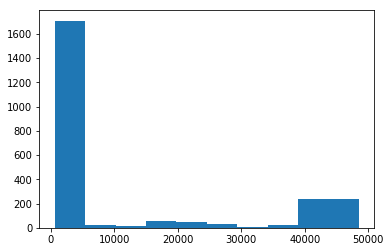

In [9]:
stack = Stack()
queue_times = []
wait_times = []

def add_tasks():
    for index, row in applications.iterrows():
        stack.push((index + 1, row))
        # Insert code here.
        queue_times.append(0)
        time.sleep(.001)

def process_tasks():
    tasks_finished = 0
    while tasks_finished < 2400:
        if stack.count() == 0:
            time.sleep(1)
        else:
            task_number, application = stack.pop()
            resp = process_application(application)
            tasks_finished += 1
            # Insert code here.
            wait_times.append(queue_times[task_number-1]*20 + 600)
            for i in range(len(queue_times)):
                queue_times[i] += 1
            

t1 = threading.Thread(target=add_tasks)
t2 = threading.Thread(target=process_tasks)

t1.start()
t2.start()
for t in [t1,t2]:
    t.join()

average_wait_time = sum(wait_times) / 2400
print(average_wait_time)

plt.hist(wait_times)

<Container object of 2400 artists>

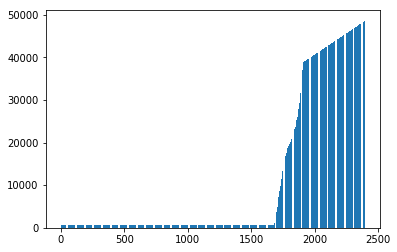

In [10]:
plt.bar(range(2400), wait_times)

### 1.8 Waiting Time With Queses - More "Fair" but less efficient

In the last screen, you saw how we reduced wait time by having people wait around until their licenses were processed. The histogram of the wait times should have looked something like this:

![img alt](https://s3.amazonaws.com/dq-content/172/wait_time_hist.png)

As you can see above, the majority of people waited for less than 5000 seconds, or about 1.5 hours. However, a few people kept getting their applications pushed to the back of the stack, and thus had to wait for 10 hours or more. If the priority was to get the majority of people their licenses as quickly as possible, using a stack was a success. However, we should see if we can make the experience better for everyone, and reduce the maximum wait time to less than 10 hours.

One way to do this might be to prioritize tasks using a queue instead of a stack. We discussed queues in the first screen of the mission -- a queue is a __first in first out__ system, where the tasks who arrived first get processed first:

![img alt](https://s3.amazonaws.com/dq-content/172/queue_operations_1.svg)

As you can see, a queue is similar to a traditional line, where things are processed in the order they arrived. Similarly to a stack, we can also simulate a queue using a Python list. We'll start with a list that contains elements 1 and 2:

```python
>> queue = [1,2]
>> queue
[1,2]
```
We then add element 3 to the bottom of the queue:

```python
>> queue.append(3)
>> queue
[1,2,3]
```
We then add 4 to the bottom of the queue:

```python
>> queue.append(4)
>> queue
[1,2,3,4]
```
We can then remove the top element of the queue:

```python
>> queue.pop(0)
1
>> queue
[2,3,4]
```
The only difference between implementing a stack using a list and implementing a queue using a list is that we use append to add new elements to the bottom of the queue. It should be apparent that this is a __more "fair" system__ -- all tasks get the __same priority__, and none of them jump the line to get processed early.

The queue corresponds to our first strategy for prioritizing tasks in the DMV application backlog. Let's measure wait time with the queue, assuming that we tell everyone to come back the next day. To keep things simple, let's say that 300 applications are added to the queue every hour, and that applications start coming in at 9am. Thus, the first 300 applications (from 1 to 300) would have to wait 23 hours (from 10am to 9am the bext day). Applications throughout the day would have to wait: * 301-600 -- 22 hours. * 601-900 -- 21 hours. * 901-1200 -- 20 hours. * 1201-1500 -- 19 hours. * 1501-1800 -- 18 hours. * 1801-2100 -- 17 hours. * 2101-2400 -- 16 hours.

The main difference here is that the stack enabled us to get some people's licenses processed immediately. Thus, we'd expect that the __average wait time__ with just the queue is __longer__, since we make everyone come back later.

### 1.9 Waiting Time With Queues

#### Instructions

* Create a list called wait_times to store the wait times.
* Create a list called queue to store the tasks.
* Create a function, add_tasks, to add tasks to the queue. The function should loop through applications, and:
    * Individually add rows to queue, along with the task numbers. The task number is the pandas row index with 1 added to it. (the row index starts at 0, but task numbers start at 1, so we need to add 1)
    * Sleep for .001 seconds.
* Create a function, process_tasks, to process tasks. The function should:
    * Check if queue is empty. If it is, wait for a second.
    * If queue is not empty, process the task using process_application.
    * Compute the wait time for this task, and append to wait_times.
* Start two threads, one for each function, and wait until they finish executing.
* Find the average wait time, in seconds, and assign to average_wait_time.
* Inspect wait_times to see how the wait time changed as more tasks were processed.
* Try varying the sleep times in the process_application and add_tasks functions. Does this change the average wait time? Why do you think this is happening?

In [11]:
import threading
import time

def process_application(application):
    time.sleep(.001)
    birth_date = datetime.strptime(application["birthdate"], "%Y-%m-%d %H:%M:%S")
    delta = (birth_date - datetime.now()).total_seconds()
    delta /= (3600 * 24 * 365.25)
    if delta < 18:
        return False
    state = application["address"].split(" ")[-2]
    if state != "CA":
        return False
    return True

wait_times = []
queue = []

def add_tasks():
    for index, row in applications.iterrows():
        task_number = index + 1
        application = row
        queue.append((task_number, application))
        time.sleep(0.001)
        
def process_tasks():
    task_finished = 0
    while task_finished < 2400:
        if queue == []:
            time.sleep(2)
        else:
            task_number, application = queue.pop(0)
            resp = process_application(application)
            task_finished += 1
            wait_times.append((23 - (task_number-1)//300)*3600)

t1 = threading.Thread(target=add_tasks)
t2 = threading.Thread(target=process_tasks)

t1.start()
t2.start()

t1.join()
t2.join()

average_wait_time = sum(wait_times)/len(wait_times)
print(average_wait_time)
print(23*3600)
print(16*3600)

70200.0
82800
57600


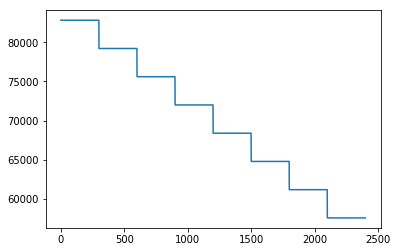

In [12]:
plt.plot(wait_times)

### 1.10 Implementing a Queue

As you saw earlier, the average wait time is higher with a queue than with a stack. This is to be expected, given our scenario where the waiting time extends all the way to the next morning. However, many tasks just need to be processed in order, and don't have a condition that means you need to either return a result very quickly or very slowly. We'll explore the histogram of waiting times with queues more in the next screen.

You should have also noticed that the wait times for queues go up as more tasks are added. The values towards the end of wait_times are much higher than the values towards the beginning. This reflects the fact that the length of the queue is increasing, so each additional task has to wait for more tasks to be processed before it can be run. A stack doesn't have this issue, since each new task is added to the top, and doesn't have to wait for the whole stack to be processed first.

For now, let's work on implementing our own queue to improve our understanding. Similarly to implementing a stack, The easiest way to implement a queue is to create a custom class. The class needs two methods at the minimum:

* push -- adds a value to the queue.
* pop -- removes a value from the queue.

Additionally, the queue needs an internal list to store the values in the stack:

* items -- a list of all the items in the queue.

Implementing push and pop is very similar to what you did when adding and removing elements from queue in the last screen.

#### Instructions

* Create a class called Queue that:
    * Uses an instance variable called items to store the queue values.
    * Has a push method to add values to the queue, and a pop method to remove values from the queue.
    * Has a count method to count the number of values in the queue.
* Instantiate an instance of Queue called queue.
* Add 1, 2, and 3 to queue.
* Remove an element from queue.

In [13]:
class Queue:
    def __init__(self):
        self.items = []
    
    def push(self, value):
        self.items.append(value)
    
    def pop(self):
        return self.items.pop(0)
    
    def count(self):
        return len(self.items)

queue = Queue()
queue.push(1)
queue.push(2)
queue.push(3)
queue.pop()

1

### 1.11 Time Spent In Queues

When we were experimenting with stacks, we adjusted how we defined waiting time. This allowed us to __base waiting time on the number of tasks executed before a given task__. This gives us a __more real-world look__ at how long tasks would take to execute __than__ our specific DMV scenario of having people __come back the next day__.

As you may recall, we used the formula __20 * applications_processed_while_waiting + 600__ to compute the waiting time for a given application. We can __keep track of the number of applications processed before an application by using a counter__. We can do this by:

* Creating a list called queue_time.
* Appending a 0 to queue_time whenever a task is placed onto the queue. The task number of the task minus one is equal to the index of the task in queue_time. If we want to look up how many tasks have been processed before a given task, we look up __queue_time[task_number - 1]__.
* When a task is processed, look up its corresponding entry in queue_time to get the __number of applications processed before it__.
* When a task is processed, add 1 to every entry in queue_time to indicate the tasks that were processed before it.

#### Instructions

* Create a list called queue_times -- we'll store __the number of applications processed before__ each application in this.
* Create a list called wait_times.
* Either use your custom Queue class, or create a list called queue.
* Modify add_tasks:
    * Append 0 to queue_times every time a task is added to queue.
* Modify process_tasks:
    * Look up the queue time from the queue_times list.
    * Calculate wait_time based on the queue time, and append to wait_times.
    * Increment all of the values in queue_times using the code provided earlier.
* Run both threads like you did in an earlier screen.
* Compute the average wait time and assign to average_wait_time.
* Inspect the value of average_wait_time. Is it what you expected? Does the number surprise you at all?
* Experiment with changing the sleep times in add_tasks and process_tasks. What happens?
* Plot a histogram of wait_times using matplotlib.

10627.641666666666


(array([ 240.,   78.,   78.,   78.,   78.,   78.,  514.,  378.,  464.,  414.]),
 array([   600.,   2158.,   3716.,   5274.,   6832.,   8390.,   9948.,
         11506.,  13064.,  14622.,  16180.]),
 <a list of 10 Patch objects>)

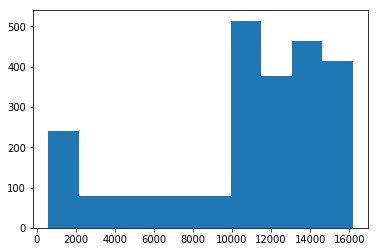

In [14]:
queue = Queue()
queue_times = []
wait_times = []

def add_tasks():
    for index, row in applications.iterrows():
        queue.push((index + 1, row))
        # Insert code here.
        queue_times.append(0)
        time.sleep(.001)

def process_tasks():
    tasks_finished = 0
    while tasks_finished < 2400:
        if queue.count() == 0:
            time.sleep(1)
        else:
            task_number, application = queue.pop()
            resp = process_application(application)
            tasks_finished += 1
            # Insert code here.
            wait_times.append(queue_times[task_number-1]*20 + 600)
            for i in range(len(queue_times)):
                queue_times[i] += 1
                
t1 = threading.Thread(target=add_tasks)
t2 = threading.Thread(target=process_tasks)

t1.start()
t2.start()
for t in [t1,t2]:
    t.join()

average_wait_time = sum(wait_times) / 2400
print(average_wait_time)

plt.hist(wait_times)

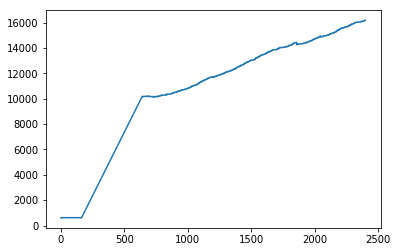

In [15]:
### real world look, rather than the assumption which assume all applicants would have to come back the next day
plt.plot(wait_times)

### 1.12 Profiling Stacks as Elements Are Added (Stack Over Time)

The average wait time using a queue wasn't extremely different from the average wait time when using a stack. However, the histogram of the queue times did look very different. Here's the histogram of wait times for the queue:

![img alt](https://s3.amazonaws.com/dq-content/172/queue_wait_time_hist.png)

And here's the histogram of wait times using the stack:

![img alt](https://s3.amazonaws.com/dq-content/172/wait_time_hist.png)

As you can tell from the above histograms, __queues have a much lower maximum wait time__ than stacks used in the same scenario. As you may be able to tell from the histograms, queues:

* Are generally best when you want all tasks processed at about the same pace
* Have a fairly low maximum wait time for processing tasks

And stacks:

* Are generally best when you want tasks processed very quickly if possible, but are okay waiting around for a while if not.
* Have a fairly high maximum wait time.

What we haven't looked into as much so far is __waiting time by position__ in the list of tasks. For example, is it better to be the 2200th task added to a stack or to a queue? Which one will be processed first? We can answer this question by storing wait time by task number, then making a bar plot of how long it took to process each task number, in order.

We can do this by initializing wait_times to have one element for each row in applications. Then, we can just store the wait time for a particular task at the position in wait_times whose index equals the task number minus one. This will give us a list, in order of when each application arrived, of how long each application took to process.

We'll start by profiling a stack, then compare to a queue.

#### Instructions

* Create a list called wait_times, with 2400 elements.
* Modify process_tasks:
    * Compute wait time based on the 20 * applications_processed_before + 600 formula.
    * Assign the wait time to the index corresponding to task_number - 1 in wait_times.
* Run both threads like you did in an earlier screen.
* Plot a bar chart of wait_times using matplotlib.
    * The x-axis should be the task number.
* What can you tell about the wait times as the stack grows larger from the bar chart? Why do you think the pattern looks the way it does?

<Container object of 2400 artists>

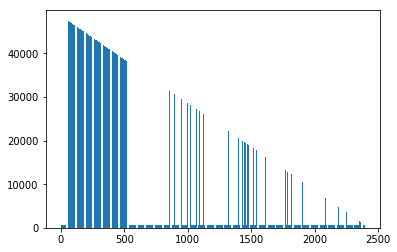

In [16]:
queue_times = []
wait_times = [0] * 2400  ### Order by position
stack = []

def add_tasks():
    for index, row in applications.iterrows():
        stack.insert(0,(index + 1, row))
        queue_times.append(0)
        time.sleep(.001)

def process_tasks():
    tasks_finished = 0
    while tasks_finished < 2400:
        if len(stack) == 0:
            time.sleep(1)
        else:
            task_number, application = stack.pop(0)
            resp = process_application(application)
            tasks_finished += 1
            task_index = task_number - 1
            wait_times[task_index] = (queue_times[task_index] * 20 + 600) ### Order by position rather than using L.append()
            for i in range(len(queue_times)):
                queue_times[i] += 1

t1 = threading.Thread(target=add_tasks)
t2 = threading.Thread(target=process_tasks)

t1.start()
t2.start()
for t in [t1,t2]:
    t.join()

plt.bar(range(2400), wait_times) # bar plot - two parameters

### 1.13 Profiling Queue as Elements Are Added

As you should have seen in the last screen, the bar chart of time taken vs position for a stack looks like this:

![img alt](https://s3.amazonaws.com/dq-content/172/stack_over_time.png)

The earlier elements kept getting pushed down the stack, and were only processed towards the end, so they had a much longer wait time. Tasks that came into the stack later were processed earlier, so had a much lower wait time. Many tasks were completed immediately, so had very little wait time. From the bar chart, we can see that tasks are either processed immediately, or have to wait until everything ahead of them is processed.

Now that we know how each task that is added to the stack is processed, let's do the same thing for queues.

#### Instructions

* Create a list called wait_times, with 2400 elements.
* Modify process_tasks:
    * Compute wait time based on the 20 * applications_processed_before + 600 formula.
    * Assign the wait time to the index corresponding to task_number - 1 in wait_times.
* Run both threads like you did in an earlier screen.
* Plot a bar chart of wait_times using matplotlib.
    * The x-axis should be the task number.
* What can you tell about the wait times as the queue grows larger from the bar chart? Why do you think the pattern looks the way it does?

<Container object of 2400 artists>

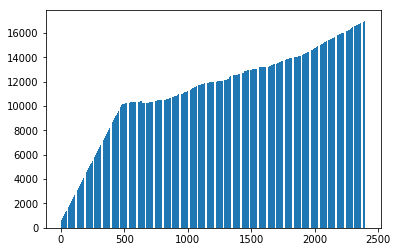

In [17]:
queue_times = []
wait_times = [0] * 2400
queue = []

def add_tasks():
    for index, row in applications.iterrows():
        queue.append((index + 1, row))
        queue_times.append(0)
        time.sleep(.001)

def process_tasks():
    tasks_finished = 0
    while tasks_finished < 2400:
        if len(queue) == 0:
            time.sleep(1)
        else:
            task_number, application = queue.pop(0)
            resp = process_application(application)
            tasks_finished += 1
            task_index = task_number - 1
            wait_times[task_index] = (queue_times[task_index] * 20 + 600)
            for i in range(len(queue_times)):
                queue_times[i] += 1

t1 = threading.Thread(target=add_tasks)
t2 = threading.Thread(target=process_tasks)

t1.start()
t2.start()
for t in [t1,t2]:
    t.join()

plt.bar(range(2400), wait_times)

### 1.14 Queues vs Stacks

The bar chart for a __queue__ in the last screen should have looked something like this:

![img alt](https://s3.amazonaws.com/dq-content/172/queue_over_time.png)

This compares to the __stack__ bar chart, which looked like this:

![img alt](https://s3.amazonaws.com/dq-content/172/stack_over_time.png)

From these charts, we can make some conclusions about stacks and queues as we add more elements. For stacks:

* Items added to a stack towards the end are processed much faster than items added towards the beginning.
* Some stack tasks are finished almost immediately after they're added.
* The worst-case queue time in a stack is equivalent to waiting for every single task to be processed first.

On the other hand, for queues:

* Items added to a queue towards the end are processed more slowly than items added earlier (this depends strongly on the throughput of the task processor).
* Only the first item added to a queue is processed instantly (given that tasks are added faster than they can be processed).
* The worst-case queue time for a queue depends on the throughput of the task processor.

We can __make some generalizations__ about __stacks and queues__ for __prioritizing tasks__ based on what we've learned:

* Stacks are better for tasks where immediacy matters, but if older messages are delivered slowly, it doesn't matter. One example is a __social network like Twitter__ -- __new tweets matter much more than older tweets__, and showing them should be prioritized. Thus you'd want to process and show newer tweets faster if your __system was overloaded__, but could afford to __ignore older ones for a while__.
* Queues are better for tasks where __consistency matters__. An example is __ordering delivery__ with a tool like __[Seamless](https://www.seamless.com/)__. Seamless __can't just ignore older orders__, so they need to process everything with a queue to __ensure fairness__.

In the DMV example, a stack seems like a better choice for processing tasks, because of the use case -- we want some people to be able to immediately get their license, but everyone else has to wait until the next day. In general, deciding to use a stack or a queue to prioritize tasks __strongly depends on the task itself__. It's advisable to figure out the peformance characteristics of all the components, and the desired characteristics of the prioritization, before deciding whether to use a stack or a queue.

In the next mission, we'll cover __arrays and lists in more depth__, and discuss how knowing which data structure you're using can dramatically speed up your analysis.

## 2. Effectively Using Arrays And Lists

### 2.1 Arrays and Binary

In the last mission, we learned about __stacks and queues__. To initially __construct__ both data structures, we used a __Python list__. If you recall, you can simulate a queue by removing elements from the beginning of a Python list, or "top" of a queue, and adding new elements to the end of the list, or the "top" of the queue:

```python
queue = [1,2]
queue.append(3) # queue is now [1,2,3]
queue.pop(0) # queue is now [2,3]
```

You might be surprised to learn that using a list as a queue is __not especially efficient__ -- in fact, the __[Python docs](https://docs.python.org/3/tutorial/datastructures.html#using-lists-as-queues)__ recommend __against using a list this way__. This is due to __how lists are implemented under the hood__. In an earlier mission, we discussed how Python is just a language, and you need an __[interpreter](https://docs.python.org/3/tutorial/interpreter.html)__ to actually execute your code. The most popular interpreter is called __CPython__, and is written in a programming language called C.

When you use __CPython__, your __Python lists__ are actually __stored as arrays in C__. An array in C has a few properties:

* It has a __fixed size__ that you specify __upfront__.
* It can only contains elements of a __single type__.

For example, the below line of C code will create an array of 10 integers:

```python
int array[10];
```

When you initialize an array in C, a fixed amount of memory is allocated, which will hold all of the values you want to add to the array. Specifying that all the elements of an array are of one type enables how much memory is needed to be calculated. In order to figure out how much memory is needed, we'll need to take a quick tour through how values are stored on a computer.

You may have heard that computers store values in binary form -- a number system that can only have the values 0 or 1. Binary is how values are stored and processed on disk, in memory, and in the CPU. Binary contrasts with our more common decimal system, where a number can have the values 0, 1, 2, 3, 4, 5, 6, 7, 8, or 9. Binary is a convenient way to store data since you only need to store 2 "positions". There are numerous places in the architecture of a computer where values can only be conveniently stored as two digits. For example, __on a hard disk, if an area is magnetized, it is read as a 1, and if it is demagnetized, it is read as a 0__.

As you can see below, when the magnetization in a small area of a hard drive goes south to north, a 1 is read, whereas if it goes the other way, a 0 is read. There are many other cases in computer architecture where it's very easy to store two states, but hard to store more (in the case of magnetization, there isn't really a way to store a 2 because there's no other direction to magnetize in).

![img alt](https://s3.amazonaws.com/dq-content/173/hd_read.svg)

Let's get some intuition around binary. We won't dive into exactly how it works, but knowing some basics will help us better understand memory allocation for arrays. Take one of your pinkie fingers. Put it down -- that's 0. Now raise it -- that's 1:

![img alt](https://s3.amazonaws.com/dq-content/173/binary_fingers.svg)

As you can see, you can represent two different numbers with just your pinkie finger -- 0 and 1. Now, let's try your ring finger. If your pinkie finger is up, but your ring finger is down, let's say that represents 2. If both fingers are up, let's call that 3:

![img alt](https://s3.amazonaws.com/dq-content/173/binary_fingers_ring_1.svg)

With two fingers using the binary system, we can represent one of 4 different numbers:

* 0 -- which maps to 0 in the decimal system we're used to.
* 1 -- which maps to 1
* 10 -- which maps to 2
* 11 -- which maps to 3

We can add the middle finger into our exercise to see how that affects things:

![img alt](https://s3.amazonaws.com/dq-content/173/binary_fingers_middle_1.svg)

As you can see, with three fingers we can store the following new numbers:

* 100 -- 4
* 101 -- 5
* 110 -- 6
* 111 -- 7

It's not important to fully understand binary, but hopefully you see a pattern emerging between how many fingers we use, and how many different numbers we can store:

* 1 finger -- 2 numbers.
* 2 fingers -- 4 numbers.
* 3 fingers -- 8 numbers.

For each finger we add, we multiply the range of numbers we can store by 2. We can calculate the range of numbers we can store for an arbitrary number of fingers by using 2 \** number of fingers. So 2 \** 4 equals 16, which means we can store any number in the range from 0 to 15 with 4 fingers.

Now, think of "fingers" as "units of memory or disk". A single unit of memory can store 2 numbers (since the values are stored in binary), but 8 units of memory can store 2 \** 8 different numbers, or 256. This means that you could store any number from 0 to 255 if you had 8 units of memory.

__One unit of memory__ is called __bit__, and __8 units of memory__ together are known as a __byte__. You may be familiar with these terms if you've ever shopped for new internet service. __Download speeds__ are often advertised in terms of __kilobits, megabits, or gigabits per second__.

Before we continue our discussion on arrays, let's look at how to convert between binary and decimal using Python. You can convert an integer to binary with the __bin()__ function:

```python
bin(10)
# Returns "0b1010"
```

As you can see above, calling bin() on an integer will return a string, with the __prefix 0b__. If you remove the prefix, you can convert the binary string back into a decimal integer:

```python
int("1010", 2)
```

The second number you pass into the __int()__ function specifies that we're converting from base 2 (binary) to base 10 (decimal).

### 2.2 Arrays and Binary

#### Instructions

* Convert each number in numbers to binary using bin(). Assign the result to binary.
    * Make sure to remove the 0b prefix from each string.
* Convert each item in binary back to decimal integers. Assign the result to new_numbers.
* Verify that new_numbers is the same as numbers.
* Do you see any patterns in binary? Think about how the binary system might work.

In [18]:
number = list(range(100))
binary = [bin(num)[2:] for num in number]
new_numbers = [int(b, 2) for b in binary]
number == new_numbers

True

In [19]:
display(id(number))
display(id(new_numbers))

2352164602504

2352205126984

### 2.3 Arrays and Lists - (static vs dynamic arrays)

Now that you understand binary a little bit better, let's move back to discussing __how arrays allocate memory__. In C, a variable can take one of several types. Here are a few:

* char -- a single character from the __ascii__ character set. Represented as a number from 0 to 255. With 256 (2 \** 8) possible values, we can represent a char as __a single byte in memory__.
* int -- at least has the range of values from -32768 to 32767, which corresponds to 65536 (2 \** 16) possible values, which we can store in __2 bytes__.
* unsigned short -- has the range of values from 0 to 65535, which can be stored in __2 bytes__.

As you can see, variables in C have a fixed minimum and maximum value they can take on. This __enables allocating memory beforehand__, since we know the number of elements we want, and how much memory each element will need -- we can just multiply the two values to __get the amount of memory we need__. For example, for an int array with 10 elements, we'll need 20 bytes of memory.

You may have noticed a __discrepancy__ here -- Python lists are implemented by the interpreter as C arrays, but lists don't have a fixed size, and they can store elements of any type, including Python objects. This is due to two reasons:

* The CPython interpreter hides the details of how it stores the values from you. It actually stores list values in an array, but automatically increases the size of the array as you add more elements to the list.
* The CPython interpreter creates an __array of pointers__, which point to objects, not an array of values.

Together, the above __principles explain__ how Python lists -- an extremely flexible data structure -- can be built using the relatively inflexible array. Let's first explore the idea of growing the size of the array as more elements are added to the list. In order to "grow" the size of an array, we need to:

* Initialize a new array with a greater size than the old array.
* Copy the elements from the old array to the new array.
* Replace the old array with the new array.

Here's how that might look:

![img alt](https://s3.amazonaws.com/dq-content/173/list_copy_1.svg)

In practice, this would make appending to a list __extremely inefficient__, since you'd need to copy every element in a list __(O(n))__ every time. Instead, CPython overallocates memory, in order to minimize copying. This means that CPython creates an array that is larger than the number of elements you have. For example, if your list only has 1 element, CPython allocates an array of size 4 so that you can add more elements without being slowed down by copying. There are certain fixed array sizes when CPython will create a new, larger, array, and copy elements over. The first few sizes are 0, 4, 8, 16, 25, and 35. So CPython will only create arrays of size 4, 8, etc. Once a Python list grows to 5 elements, they'll be copied over to a new CPython array of size 8, like this:

![img alt](https://s3.amazonaws.com/dq-content/173/list_copy_long.svg)

Although this overallocation is slightly memory inefficient, it greatly speeds up how quickly you can append to or insert into lists. We can figure out where the allocation points occur by profiling appending to a list over several thousand iterations.


### 2.4 Arrays and Lists

#### Instructions

* Loop from 0 to iterations.
    * Initialize a list, l.
    * Loop across numbers. The loop variable should be i.
        * Start a timer.
        * Append i to l.
        * End a timer.
        * If the key i doesn't exist in times, assign an empty list to times[i].
        * Append the total time taken to the key in times with the value i.
* Create a list avg_times.
* Loop across numbers. Use the loop variable i.
    * Find the sum() of all the values in times[i].
    * Append the sum to avg_times.
* Make a bar plot of numbers against avg_times.
* Do you see any patterns in the bar plot? What do you think they tell you?

<Container object of 20 artists>

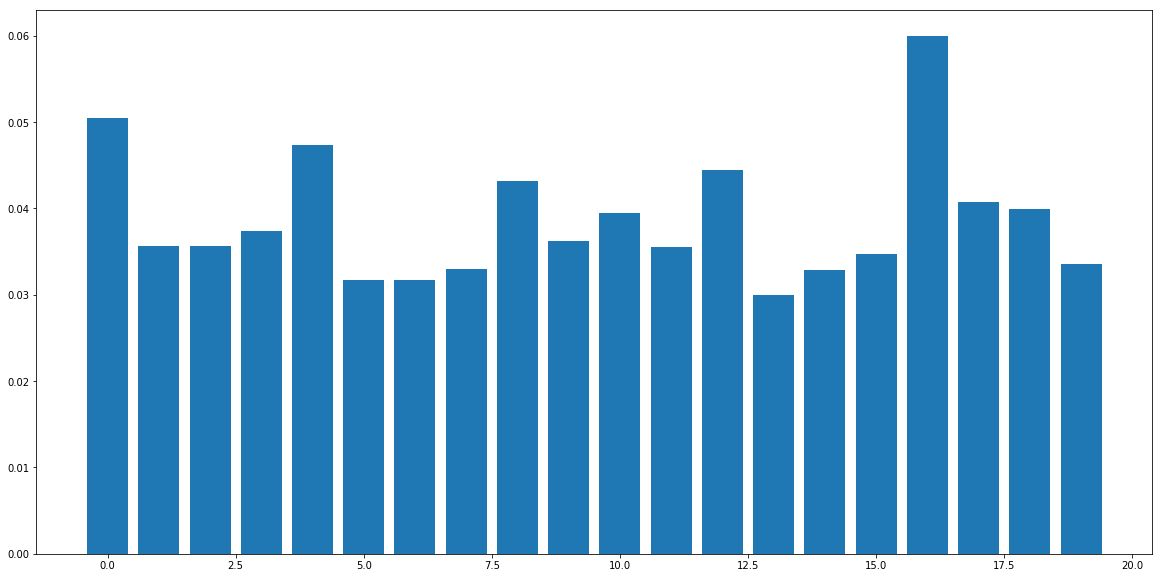

In [20]:
import time
import matplotlib.pyplot as plt

times = {}
iterations = 100000
numbers = list(range(20))

for iter in range(iterations):
    l = []
    for i in numbers:
        start = time.time()
        l.append(i)
        end = time.time()
        elapsed = end - start
        if i not in times:
            times[i] = []
        times[i].append(elapsed)
        
avg_times = []
for i in numbers:
    avg_times.append(sum(times[i]))
    
plt.figure(figsize=(20,10))    
plt.bar(numbers, avg_times, width=0.8)

### 2.5 Array Pointers

You should have seen a bar plot similar to this in the last screen:

![img alt](https://s3.amazonaws.com/dq-content/173/append_plot.png)

You may notice __distinct peaks__ around 4, 8, and 16. This corresponds to Python __growing the underlying C array__ to the next largest size when the __size maximum is hit__. This operation takes some time, but appending the 5th element isn't much more costly than appending the 6th element. However, recall that __copying is an O(n) operation__. With large datasets growing the list can become a huge time sink, and we'll look into alternative data structures later in this mission that don't have this limitation.

We discussed earlier how Python lists can store data of any type, but C arrays are restricted to a single type. Python lists manage to store any kind of data __thanks to pointers__. A pointer is special kind of variable in C that points to the value of another variable in memory. This allows us to refer to the same value in multiple places without having to copy the value.

A good analogy for pointers is the idea of a shared textbook. Let's say I own a textbook, and my friend wants to also read it. I can copy the textbook, and give my friend the copy, but that takes a lot of upfront effort. Instead, I can tell my friend where the book is, and put it in a shared location. This way, my friend can read the textbook whenever they want, but I don't have to put in a lot of effort in beforehand. The __downside__ to this is that any __changes__ my friend makes to the textbook, like highlighting pages, will be reflected to both of us.

We can create a __pointer__ for a specific type in C using \*:

```python
>> int *ptr;
```
We can then have the pointer refer to the value in memory of another variable using &:

```python
>> int x;
>> x = 5;
>> ptr = &x;
```
When we __assign &x to ptr__, we're actually assigning a __memory address__, like 0x7fca72d03a38 to ptr. This tells the system where to find the value that x is storing in memory. Using this address, you can access and modify the underlying value. Finally, we can display the value of the variable using the pointer and __\*__:

```python
>> printf("%i", *ptr);
5
```
We can also modify the value of the variable through the pointer:

```python
>> *ptr = 10;
>> printf("%i", x);
10
```
Python creates an array of pointers in C. This enables the array to still be of all the __same type (pointers)__, but enables each pointer to point to a different type of variable. The pointer actually stores a memory address, which tells it where in memory the value it points to is.

When you're using CPython, you can use the __[id()](https://docs.python.org/3/library/functions.html#id)__ function to see the memory address of any variable. If you wrap this in the __[hex()](https://docs.python.org/3/library/functions.html#hex)__ function, you can convert the address to hexadecimal, which is easier to read:

```python
>> z = 1
>> hex(id(1))
0x7fca72d03a38
```

A __memory address refers to a byte or sequence of bytes in memory__ where values are stored. Think of a computer's memory being divided into addresses. If you have 4096 bytes of memory, each byte will be a separate address, so you'll have 4096 addresses. Addresses are typically shown in __hexadecimal__, and look like 0x7. Because variables in C have fixed sizes, a pointer only stores the __starting memory address__ for a variable, then reads as many bytes as the __size of the variable__ requires:

![img alt](https://s3.amazonaws.com/dq-content/173/memory_pointers.svg)

In [21]:
display(id(1))
display(hex(id(1)))
display(int(hex(id(1))[2:], 16))

1724932256

'0x66d060a0'

1724932256

### 2.6 Array Pointers

#### Instructions

* Assign the memory address in hex format of sentence to sentence_hex.
* Assign the memory address in hex format of sentence2 to sentence2_hex.
* Find the memory address in hex format for each element in values. Assign the result to values_elements_hex.
* Find the memory address for values (the whole list). Assign the result to values_hex.
* Look at sentence_hex and sentence2_hex. Do you see anything interesting?
* Look at the values in values_elements_hex. Is there a pattern?
* Look at values_hex. Does it match anything in values_elements_hex? What does that tell you?

In [22]:
sentence = "I desperately want a 1982 Winnebago."
sentence2 = sentence

values = [1,2,3,4,5]

#sentence_hex = [hex(id(s)) for s in list(sentence)]

#sentence2_hex = [hex(id(s)) for s in list(sentence2)]

sentence_hex = hex(id(sentence))
sentence2_hex = hex(id(sentence2))

values_elements_hex = [hex(id(num)) for num in values]

values_hex = hex(id(values))

display(sentence_hex)
display(sentence2_hex)

display(sentence_hex == sentence2_hex)
display(sentence is sentence2)

display(id(sentence_hex))
display(id(sentence2_hex))
display(sentence_hex is sentence2_hex)

display(values_elements_hex)
display(values_hex)



'0x223a6a47c38'

'0x223a6a47c38'

True

True

2352164604080

2352164604528

False

['0x66d060a0', '0x66d060c0', '0x66d060e0', '0x66d06100', '0x66d06120']

'0x223ae5dfc08'

### 2.7 Implementing An Array

Now that we understand __how arrays and Python lists are related__, let's implement an array of our own in Python. The main constraints on this array will be that it will be of __fixed size__, and that it will only store variables of a __single type__. We'll be storing __[Google stock prices on successive days](https://www.google.com/)__, which we'll get from __prices.csv__. This data was downloaded from __[Yahoo Finance](https://finance.yahoo.com/)__ using the code in __download_data.py__. Here are the first few rows of the data:

<table class="dataframe">
<thead>
<tr>
<th></th>
<th>date</th>
<th>price</th>
</tr>
</thead>
<tbody>
<tr>
<th>0</th>
<td>2012-01-03</td>
<td>665.411118</td>
</tr>
<tr>
<th>1</th>
<td>2012-01-04</td>
<td>668.281154</td>
</tr>
<tr>
<th>2</th>
<td>2012-01-05</td>
<td>659.011109</td>
</tr>
<tr>
<th>3</th>
<td>2012-01-06</td>
<td>650.021102</td>
</tr>
<tr>
<th>4</th>
<td>2012-01-09</td>
<td>622.461047</td>
</tr>
</tbody>
</table>

We'll create an array that can store stock prices, as well as perform other operations, like removing prices. In order to implement this, we'll use the __[NumPy array type](https://docs.scipy.org/doc/numpy/reference/generated/numpy.ndarray.html)__. The NumPy array type is based on a C array, and behaves very similarly, so it's a __better choice for implementing an array class than a Python list__, which doesn't behave like a C array. We'll implement our own methods like append to better understand how arrays work.

To begin with, we can implement the array as a class:

```python
import numpy as np
​
class Array():
    def __init__(self, size):
        self.array = np.zeros(size, dtype=np.float64)
        self.size = size
```

We'll take in an integer specifying the __size__ of the array, then create an array that contains all __0__ values. The __dtype__ indicates that the array will contain float values. We then assign to self.size so we can easily track the size of the array.

We can next implement methods that allow us to __access and change values__. We can accomplish this by implementing the __[getitem and setitem methods](https://docs.python.org/3/reference/datamodel.html#object.__getitem__)__. These methods allow you to access items in a class using list-style syntax (list[0] = 0 and print(list[0])).

Here's an example:

```python
class Array():
    def __init__(self, size):
        self.array = np.zeros(size, dtype=np.float64)
        self.size = size
​
    def __getitem__(self, key):
        return self.array[key]
```

You could then do this:

```python
arr = Array(10)
print(arr[9]) # displays 0.
```


#### download_data.py
```python

from yahoo_finance import Share
import csv

goog = Share('GOOG')
data = goog.get_historical('2012-01-01', '2017-03-17')
write = []
write = [[d["Date"], d["Close"]] for d in data]

write = sorted(write, key=lambda x:x[0])
write.insert(0,["date", "price"])
with open("prices.csv", "w+") as f:
    writer = csv.writer(f)
    writer.writerows(write)
```



### 2.8 Implementing An Array

* Read in prices.csv.
* Extend the Array class shown so that \__setitem\__ is also functional.
* Create an instance of the array class called prices with 10 elements.
* Set the elements of prices to the first 10 prices in prices.csv using \__setitem\__.


#### I/O
* f.read()
* f.readline()
* f.readlines()

In [23]:
import numpy as np

######## Solution from Dataquest
with open("Data/prices.csv", 'r') as f:
    data = f.readlines() ### not taking advantage of 

all_prices = [d.split(",")[1] for d in data][1:] 
all_prices = [float(p.strip()) for p in all_prices]

class Array():
    def __init__(self, size):
        self.array = np.zeros(size, dtype=np.float64)
        self.size = size
    
    def __getitem__(self, key):
        return self.array[key]
    
    def __setitem__(self, key, value):
        self.array[key] = value

prices = Array(10)

for i in range(10):
    prices[i] = all_prices[i]
        
print(prices)
print(prices.array)

[ 665.411118  668.281154  659.011109  650.021102  622.461047  623.141078
  625.961061  629.641069  624.991068  628.581079]


In [24]:
import numpy as np
import csv

class Array:
    def __init__(self, size):
        self.array = np.zeros(size, dtype=np.float64)
        self.size = size
        
    def __getitem__(self, key):
        return self.array[key]
    
    def __setitem__(self, key, value):
        self.array[key] = value

In [25]:
prices = Array(10)

In [26]:
with open('Data/prices.csv') as f: # f is both an iterator and an iterable
    reader = csv.reader(f) # reader object is an iterator
    header = next(reader) # skip the header
    for i in range(10): # first 10 data
        #prices[i] = float(next(reader)[1].strip())
        prices[i] = float(next(reader)[1].strip())



In [27]:
print(prices)
prices.array

array([ 665.411118,  668.281154,  659.011109,  650.021102,  622.461047,
        623.141078,  625.961061,  629.641069,  624.991068,  628.581079])

### 2.9 Resizing The Array

In the last screen, we implemented an array that allowed for elements to be viewed and changed. However, what happens if we want to add an element to the array? This is where the __insert() method__ of a list comes in handy. The insert method allows someone to add an element at any position, like this:

```python
list = [1,2,3]
list.insert(1,5) # list is now [1,5,2,3]
```

After implementing a way to insert into our array, we can implement the __[len](https://docs.python.org/3/reference/datamodel.html#object.__len__)__ method, then implement appending like this:

```python
def append(self, value):
    self.insert(len(self), value)
```

To allow for insertion into an array, we'll need to figure out a way to:

* Create a new array with one more element than the current array.
* Loop across the old array and copy elements into the new array.
    * When we hit the index that we want to insert the new element into, insert it, then keep going.

Here's a diagram:

![img alt](https://s3.amazonaws.com/dq-content/173/list_insertion.svg)

#### Instructions

* Implement a method in the Array class called insert. It should:
    * Take in a position to insert in, then a number to insert.
    * Create an array one element larger than the old array.
    * Increment self.size.
    * Loop across each element in self.array, and copy it into the same position in the new array.
        * If the position we're inserting into is the same we're copying into, then copy the new element, then the old element.
        * Keep track of the position we're copying from, and the position we're copying into, because the insertion will make them different.
    * If we're inserting at the end of the array (position to insert == self.size), then add the value to the end of the new array.
    * Replace self.array with the new array.
* Implement the \__len\__ method on the Array class that returns the size of the array.
* Implement an append method on the Array class.
* Instatiate an instance of Array called prices, with size 0.
* Append the first 100 prices from prices.csv to prices.
* Insert 646.921081 into position 50 in prices. 

In [28]:
##########3 Solution from Dataquest
class Array():
    def __init__(self, size):
        self.array = np.zeros(size, dtype=np.float64)
        self.size = size
    
    def __getitem__(self, key):
        return self.array[key]
    
    def __setitem__(self, key, value):
        self.array[key] = value
        
    def insert(self, position, value):
        new_array = np.zeros(self.size+1, dtype=np.float64)
        new_pos = 0
        for i, item in enumerate(self.array):
            if i == position:
                new_array[new_pos] = value
                new_pos += 1
            new_array[new_pos] = item
            new_pos += 1
        if position == self.size:
            new_array[new_pos] = value
        self.size += 1
        self.array = new_array
        
    def __len__(self):
        return self.size
    
    def append(self, value):
        self.insert(len(self), value)
        
prices = Array(0)

for price in all_prices[:100]:
    prices.append(price)
    
prices.insert(50, 646.921081)   
print(prices[50])

646.921081


In [29]:
#### My Answer:

class Array():
    def __init__(self, size):
        self.array = np.zeros(size, dtype=np.float64)
        self.size = size
    
    def __getitem__(self, key):
        return self.array[key]
    
    def __setitem__(self, key, value):
        self.array[key] = value
        
    def insert(self, key, value):
        self.size += 1
        new_array = np.zeros(self.size, dtype=np.float64)
        for i in range(self.size):
            if i < key:
                new_array[i] = self.array[i]
            elif i == key:
                new_array[i] = value
            else:
                new_array[i] = self.array[i-1]
        self.array = new_array
        
    def __len__(self):
        return self.size
    
    def append(self, value):
        self.insert(self.size, value)

In [30]:
prices = Array(0)

In [31]:
with open('Data/prices.csv') as f:
    reader = csv.reader(f)
    header = next(reader)
    for i in range(100):
        value = float(next(reader)[1].strip())
        prices.append(value)

print(len(prices))

prices.insert(50, 646.921081)
print(len(prices))
prices[50]

100
101


646.92108099999996

### 2.10 Resizing The Array

Now that we've learned how to insert elements into the array, let's experiment with removing them. Removing an element is very similar to insertion:

![img alt](https://s3.amazonaws.com/dq-content/173/list_removal.svg)

As you can see above, we:

* Loop through each element in the old array
    * If the element isn't the one we want to remove, copy it over to the new array
    * If we want to remove it, just skip to the next element

We'll have to keep track of the index we're copying from (in the old array), and the index we're copying to (in the new array), because the indices will diverge after we "skip" the item in the old array to be removed.

#### Instructions

* Implement a method in the Array class called pop. It should:
    * Take in a position to pop.
    * Create an array one element smaller than the old array.
    * Decrement self.size.
    * Loop across each element in self.array, and copy it into the same position in the new array.
        * If we're removing the element in the position, assign the element to removed, then skip copying it.
        * Keep track of the position we're copying from, and the position we're copying into, because the removal will make them different.
    * Replace self.array with the new array.
    * Return removed.
* Instatiate an instance of Array called prices, with size 0.
* Append the first 100 prices from prices.csv to prices.
* Pop the element at position 40 in prices.

In [32]:
class Array():
    def __init__(self, size):
        self.array = np.zeros(size, dtype=np.float64)
        self.size = size
    
    def __getitem__(self, key):
        return self.array[key]
    
    def __setitem__(self, key, value):
        self.array[key] = value
        
    def insert(self, key, value):
        self.size += 1
        new_array = np.zeros(self.size, dtype=np.float64)
        for i in range(self.size):
            if i < key:
                new_array[i] = self.array[i]
            elif i == key:
                new_array[i] = value
            else:
                new_array[i] = self.array[i-1]
        self.array = new_array
        
    def __len__(self):
        return self.size
    
    def append(self, value):
        self.insert(self.size, value)
        
    def pop(self, key=None): ## to pop out the last element by default
        self.size -= 1
        new_array = np.zeros(self.size, dtype=np.float64)
        if key == None:
            removed = self.array[self.size]
            for i in range(self.size):
                new_array[i] = self.array[i]
            self.array = new_array
            return removed
        else:
            removed = self.array[key]
            for i in range(self.size):
                if i < key:
                    new_array[i] = self.array[i]
                elif i == key:
                    pass
                else:
                    new_array[i] = self.array[i+1]
            self.array = new_array
            return removed           

In [33]:
prices = Array(0)

In [34]:
with open('Data/prices.csv') as f:
    reader = csv.reader(f)
    header = next(reader)
    for i in range(100):
        value = float(next(reader)[1].strip())
        prices.append(value)
print(len(prices))

100


In [35]:
print(prices[40])
print(prices.pop(40))
print(len(prices))
print(prices[-1])
prices.pop()

622.401069
622.401069
99
603.661013


603.66101300000003

In [36]:
########### Solution from Dataquest

class Array():
    def __init__(self, size):
        self.array = np.zeros(size, dtype=np.float64)
        self.size = size
    
    def __getitem__(self, key):
        return self.array[key]
    
    def __setitem__(self, key, value):
        self.array[key] = value
    
    def insert(self, position, value):
        new_array = np.zeros(self.size + 1, dtype=np.float64)
        new_pos = 0
        for i, item in enumerate(self.array):
            if i == position:
                new_array[new_pos] = value
                new_pos += 1
            new_array[new_pos] = item
            new_pos += 1
        if position == (self.size):
            new_array[new_pos] = value
        self.size += 1
        self.array = new_array
    
    def __len__(self):
        return self.size
    
    def append(self, value):
        self.insert(self.size, value)
    
    def pop(self, position):
        new_array = np.zeros(self.size - 1, dtype=np.float64)
        removed = None
        new_position = 0
        for i, item in enumerate(self.array):
            if i == position:
                removed = self.array[i]
                continue
            new_array[new_position] = self.array[i]
            new_position += 1
        self.array = new_array
        self.size -= 1
        return removed

prices = Array(0)

for price in all_prices[:100]:
    prices.append(price)

prices.pop(40)

622.40106900000001

### 2.11 Linked Lists (Random Access V.S. Sequential Access)

From the past few screens, you should have noted a few characteristics of arrays:

* __Looking up__ elements is fast, since you just need to pass an index. The value is immediately fetched from memory. In fact, lookups are __O(1)__, since they happen in __constant time__, irrespective of the size of the array.
* Inserting or removing elements from an array takes __O(n)__ time, since you need to __loop over__ each of the elements.
* Arrays needs to be __resized__ when you want to add more elements than their size, so that more memory can be allocated.
* It's not necessary to resize an array when you remove an element -- you can just copy over all of the elements to the new array, and leave a 0 or null value at the end. ?????

When you're working with __dynamic data__ that keeps having new entries added, some of the characteristics of an array -- namely the performance penalty of insertions -- can become a __burden__. In these cases, it can be useful to use another type of data structure called a __linked list__. A linked list is not the same as a Python list (as we discussed, __Python lists are actually implemented as arrays__). Linked lists differ from arrays in that they don't have a fixed size. Instead of allocating memory for a certain number of elements of a certain type __beforehand__, linked lists allow you to __flexibly__ add as many elements as you want. Linked lists achieve this by __storing links between items__. Here's how they compare to arrays:

![img alt](https://s3.amazonaws.com/dq-content/173/arrays_ll.svg)

Let's go through an example to understand how these links work. Let's say that we have the first 5 stock prices from all_prices, stored as separate variables:

```python
price_1 = 665.411118
price_2 = 668.281154
price_3 = 659.011109
price_4 = 650.021102
price_5 = 622.461047
```

While it's certainly possible to store all of the prices as separate variables, this can __quickly become painful__ for a few reasons:

    * We won't be able to quickly perform operations like finding the average of all of the prices.
    * We'll have to keep track of hundreds of variables.
    * We won't easily be able to process values in a loop or the equivalent.

When we have disconnected data like this, a good model is to think of each variable as a separate node. We can enforce this separation more clearly by making a separate class to hold each variable:

```python
class Node():
    def __init__(self, value):
        self.value = value
```

We can then create five nodes:

```python
price_1 = Node(665.411118)
price_2 = Node(668.281154)
price_3 = Node(659.011109)
price_4 = Node(650.021102)
price_5 = Node(622.461047)
```

We have 5 nodes now, which are defined as their own classes. But we want each node to be linked, like this:

![img alt](https://s3.amazonaws.com/dq-content/173/linked_list_nodes.svg)

In effect, we're linking each price to the price on the next day. This makes sense, since our data is __sequential__. It's very similar to indexing an array of prices with prices[0] then prices[1]. Our links just show that price_2 comes after price_1. We can create these links in code by "pointing" nodes at the next node:

```python
class Node():
    def __init__(self, value):
        self.value = value
        self.next_node = None
​
    def set_next_node(self, node):
        self.next_node = node
```

We can then set up each node to point to the next node:

```python
price_1.set_next_node(price_2)
price_2.set_next_node(price_3)
price_3.set_next_node(price_4)
price_4.set_next_node(price_5)
```

After we've setup all of the next nodes, we can print out all of the prices using a while loop:

```python
current_node = price_1
while current_node.next_node is not None:
    print(current_node.value)
    current_node = current_node.next_node
print(current_node.value)
```

Here's what will happen with the above code:

![img alt](https://s3.amazonaws.com/dq-content/173/linked_list_loop.svg)

Here's an alternative view of what's happening:

![img alt](https://s3.amazonaws.com/dq-content/173/linked_list_loop_nodes.svg)

As you can see, our loop iterates through each node. Remarkably, all you need to know to do this is the next node of each node. You don't need to know all the value you're storing upfront, or their types. You just need to know the value of the current node, and a pointer to the next node. This property makes linked lists incredibly versatile.

Before we explore linked lists more, let's work on an __append method__ for linked lists.



### 2.12 Linked Lists


#### Instructions

* Modify the Node class shown to add an append method that takes in a value argument, and:
    * Creates a new node with the specified value.
    * Sets the node to be the next_node for the current node.
    * Returns the new node.
* Create the first node of a linked list called price_1, with the value of the first price in all_prices.
* Use the append method to append the next 4 prices from all_prices to the linked list.
* Loop through the linked list, starting from the first node, and print out each value.

In [37]:
import csv

with open('Data/prices.csv') as f:
    reader = csv.reader(f)
    header = next(reader)
    all_prices = [float(price[1].strip()) for price in reader]

In [38]:
class Node:
    def __init__(self, value):
        self.value = value
        self.next_node = None
        
    def set_next_node(self, node):
        self.next_node = node
        
    def append(self, value):
        self.next_node = Node(value)
        return self.next_node
    
    
    
        

In [39]:
price_1 = Node(all_prices[0])
price_2 = price_1.append(all_prices[1])
price_3 = price_2.append(all_prices[2])
price_4 = price_3.append(all_prices[3])
price_5 = price_4.append(all_prices[4])

In [40]:
current_node = price_1
while current_node.next_node is not None:
    print(current_node.value)
    current_node = current_node.next_node
print(current_node.value)

665.411118
668.281154
659.011109
650.021102
622.461047


In [41]:
all_prices[:5]

[665.411118, 668.281154, 659.011109, 650.021102, 622.461047]

In [42]:
##### Solutions from Dataquest

class Node():
    def __init__(self, value):
        self.value = value
        self.next_node = None
    
    def set_next_node(self, node):
        self.next_node = node
    
    def append(self, value):
        next_node = Node(value)
        self.next_node = next_node
        return next_node
    
price_1 = Node(all_prices[0])
node = price_1
for i in all_prices[1:5]:
    node = node.append(i)

current_node = price_1
while current_node.next_node is not None:
    print(current_node.value)
    current_node = current_node.next_node
print(current_node.value)

665.411118
668.281154
659.011109
650.021102
622.461047


### 2.13 Indexing a Linked List


After appending data to a linked list, we may want to access the second value in the list, or the tenth. With an array, this is simple -- we just call array[1] to get the second value, for example. With a linked list, we need to __loop through the list__ until we get to the index we want. Here's an example:

![img alt](https://s3.amazonaws.com/dq-content/173/linked_list_search.svg)

As you can see, we move "down" the linked list 2 positions from price_1, then return that node. Because of how a linked list is structured, we need to scan through the list to find the item we want -- we can't just directly index it like in an array.

We don't have to keep references to each node in a linked list as variables, but we want to keep the first node around. This is because without the first node, we have no way to refer to the other nodes. Assigning the first node to a variable will allow us to use the first node to index the rest. Since each node contains a reference to the next node, we can reference the whole linked list from the first node.

#### Instructions

* Implement an __getitem__ method on the Node class like we did with our Array class earlier. It should:
    * Take in a position.
    * Iterate through the next nodes until you get to the position.
    * Return the current node.
* Create the first node of a linked list called price_1, with the value of the first price in all_prices.
* Use the append method to append the next 4 prices from all_prices to the linked list.
* Index the linked list (using price_1), and print the value of the 3rd and 4th elements.



In [43]:
class Node():
    def __init__(self, value):
        self.value = value
        self.next_node = None
    
    def set_next_node(self, node):
        self.next_node = node
    
    def append(self, value):
        self.next_node = Node(value)
        return self.next_node
    
    def __getitem__(self, key):
        pos = 0
        current_node = self
        while pos < key:
            current_node = current_node.next_node
            pos += 1
        return current_node
            

In [44]:
price_1 = Node(all_prices[0])
node = price_1
for i in range(1,5):
    node = node.append(all_prices[i])

In [45]:
print(price_1[3].value)

650.021102


In [46]:
##### Solutions from Dataquest

class Node():
    def __init__(self, value):
        self.value = value
        self.next_node = None
    
    def set_next_node(self, node):
        self.next_node = node
    
    def append(self, value):
        next_node = Node(value)
        self.next_node = next_node
        return next_node
    
    def __getitem__(self, key):
        node = self
        counter = 0
        while counter < key:
            node = node.next_node
            counter += 1
        return node
    
price_1 = Node(all_prices[0])
node = price_1
for i in all_prices[1:5]:
    node = node.append(i)

print(price_1[2].value)

659.011109


### 2.14 Inserting Into A Linked List

As we saw in two screens ago, appending to a linked list is very efficient. This is because we don't need to move any elements, we just add a new pointer to the next item in the linked list. Inserting and element into a linked list is similarly straightforward. Because the elements don't have a fixed position (they just refer to the next item in the chain), we only need to update a single element:

![img alt](https://s3.amazonaws.com/dq-content/173/linked_list_insert.svg)

As you can see above, we:

Create a new node with the data we want to add.
Point the previous element in the linked list at the new node.
Point the new node at the next element in the linked list.
We essentially split the linked list into two pieces, then join the pieces with a new node:


![img alt](https://s3.amazonaws.com/dq-content/173/linked_list_insert2.svg)

If we're inserting at the first or last position in the linked list, we only need to worry about joining the new node to a single "old" node. If you're inserting into position 0, your linked list has a new "start" node, so you'll need to replace the old start node with it. To handle inserting into position 0, we'll need to return the new "top" node from insert each time. Here's a diagram:

![img alt](https://s3.amazonaws.com/dq-content/173/linked_list_insert_top.svg)

#### Instructions

* Implement an insert method on the Node class like we did with the Array class earlier. It should:
    * Take in a position and value.
    * Create a new node containing value.
    * Handle the case when position equals 0.
    * Find the nodes before and after the position of the new node we'll be inserting. (split_start and split_end)
    * Insert the new node in between split_start and split_end.
    * Return the new "top" node.
        * This will be self unless we've inserted into position 0.
* Create the first node of a linked list called price_1, with the value of the first price in all_prices.
* Use the append method to append the next 4 prices from all_prices to the linked list.
* Insert the element with index 5 in all_prices into position 3 of the linked list.
    * Assign the result back to price_1.
* Insert the element with index 6 in all_prices into position 0 of the linked list.
    * Make sure to assign this node to price_1, since it's now the first node in the list.
* Insert the element with index 7 in all_prices into position 7 of the linked list.
    * Assign the result back to price_1.
* Print the value of the node at position 4 in the list.

In [47]:
class Node():
    def __init__(self, value):
        self.value = value
        self.next_node = None
    
    def set_next_node(self, node):
        self.next_node = node
    
    def append(self, value):
        self.next_node = Node(value)
        return self.next_node
    
    def __getitem__(self, key):
        pos = 0
        current_node = self
        while pos < key:
            current_node = current_node.next_node
            pos += 1
        return current_node
    
    def insert(self, key, value):
        new_node = Node(value)
        if key == 0:
            old_head = self
            new_head = new_node
            self = new_head
            self.next_node = old_head
        else:
            split_start = self[key-1]  ### searching
            split_end = split_start.next_node
            split_start.next_node = new_node
            new_node.next_node = split_end
        return self 

In [48]:
price_1 = Node(all_prices[0])
node = price_1
for i in range(1,5):
    node = node.append(all_prices[i])
    
price_1 = price_1.insert(3, all_prices[5])
price_1 = price_1.insert(0, all_prices[6])
price_1 = price_1.insert(7, all_prices[7])

In [49]:
price_1[4].value

623.141078

In [50]:
######### Solution from Dataquest

class Node():
    def __init__(self, value):
        self.value = value
        self.next_node = None
    
    def set_next_node(self, node):
        self.next_node = node
    
    def append(self, value):
        next_node = Node(value)
        self.next_node = next_node
        return next_node
    
    def __getitem__(self, key):
        node = self
        counter = 0
        while counter < key:
            node = node.next_node
            counter += 1
        return node
    
    def insert(self, position, value):
        if position == 0:
            node = Node(value)
            node.next_node = self
            return node
        else:
            node = Node(value)
            split_start = self[position - 1]
            split_end = split_start.next_node
            split_start.next_node = node
            node.next_node = split_end
            return self
        
    
price_1 = Node(all_prices[0])
node = price_1
for i in all_prices[1:5]:
    node = node.append(i)

price_1 = price_1.insert(3, all_prices[5])
price_1 = price_1.insert(0, all_prices[6])
price_1 = price_1.insert(7, all_prices[7])

print(price_1[4].value)

623.141078


### 2.15 Removing From A Linked List

Removing values from a linked list is very similar to insertion. We split the list into three pieces, then only join two of the pieces back together:

![img alt](https://s3.amazonaws.com/dq-content/173/linked_list_delete.svg)

As you can see above, this cuts out a single node, but leaves the rest of the list intact. We can accomplish this by setting the next_node property of a node to the node 2 positions "down" the list. This will skip the node in between them, effectively removing it from the list.

Note that we'll need to return not only the node we removed (the value we popped from the list), but also the new "top" node. This is because if we remove the node at position 0, we'll need to change the "top" node to the node at position 1.

#### Instructions

* Implement a pop method on the Node class like we did with the Array class earlier. It should:
    * Take in a position.
    * Check if the position is 0, and handle that case.
        * Return self as the node that was removed, and self.next_node as the new "top" node.
    * Find the node just before the node to be removed. Assign to split_start.
    * Find the node just after the node to be removed. Assign to split_end.
        * Note that this can be None if we're removing the last node in the list.
    * Assign split_end to be the next_node of split_start.
    * Return the node you removed, and the new top node (should be self).
* Create the first node of a linked list called price_1, with the value of the first price in all_prices.
* Use the append method to append the next 4 prices from all_prices to the linked list.
* Remove the node at position 0.
    * Remember to handle the assignment of the new top node.
* Remove the node at position 3.
    * Remember to handle the assignment of the top node.
* Print the value of the node at position 2 in the list.

In [51]:
class Node():
    def __init__(self, value):
        self.value = value
        self.next_node = None
    
    def set_next_node(self, node):
        self.next_node = node
    
    def append(self, value):
        self.next_node = Node(value)
        return self.next_node
    
    def __getitem__(self, key):
        pos = 0
        current_node = self
        while pos < key:
            current_node = current_node.next_node
            pos += 1
        return current_node
    
    def insert(self, key, value):
        new_node = Node(value)
        if key == 0:
            old_head = self
            new_head = new_node
            self = new_head
            self.next_node = old_head
        else:
            split_start = self[key-1]  ### searching
            split_end = split_start.next_node
            split_start.next_node = new_node
            new_node.next_node = split_end
        return self 
    
    def pop(self, key):
        if key == 0:
            to_remove = self
            self = self.next_node
            return self, to_remove
        else:
            split_start = self[key-1]
            to_remove = split_start.next_node
            split_end = to_remove.next_node
            split_start.next_node = split_end
            return self, to_remove

In [52]:
price_1 = Node(all_prices[0])
node = price_1
for i in range(1,5):
    node = node.append(all_prices[i])

In [53]:
price_1, _ = price_1.pop(0)
price_1, _ = price_1.pop(3)
print(price_1[2].value)

650.021102


In [54]:
############## Solution from Dataquest

class Node():
    def __init__(self, value):
        self.value = value
        self.next_node = None
    
    def set_next_node(self, node):
        self.next_node = node
    
    def append(self, value):
        next_node = Node(value)
        self.next_node = next_node
        return next_node
    
    def __getitem__(self, key):
        node = self
        counter = 0
        while counter < key:
            node = node.next_node
            counter += 1
        return node
    
    def insert(self, position, value):
        if position == 0:
            node = Node(value)
            node.next_node = self
            return node
        else:
            node = Node(value)
            split_start = self[position - 1]
            split_end = split_start.next_node
            split_start.next_node = node
            node.next_node = split_end
            return self
    
    def pop(self, position):
        if position == 0:
            return self, self.next_node
        else:
            split_start = self[position - 1]
            to_remove = split_start.next_node
            split_end = to_remove.next_node
            split_start.next_node = split_end
            return to_remove, self
        
    
price_1 = Node(all_prices[0])
node = price_1
for i in all_prices[1:5]:
    node = node.append(i)

removed, price_1 = price_1.pop(0)
removed, price_1 = price_1.pop(3)

print(price_1[2].value)

650.021102


### 2.16 Arrays VS Linked Lists

As you've seen in the last few screens, linked lists have the following characteristics:

    * You don't have to specify how many nodes you want upfront -- you can store as many values as you want.
    * Data isn't restricted to a single type -- you can store any data you want in any node.
    * Finding an element in a linked list takes O(n) time since we need to iterate through potentially all of the elements to find the one we want.
    * Insertions and deletions are fast since we don't need to copy anything -- we just need to find the insertion or deletion point.

In general, linked lists are better if you're storing values, and you don't know how many you want to store. Linked lists are also easier to combine and shuffle (since you're just changing what each node points to), so they can be better in multithreaded scenarios where you're adding to a common list. Because of this, the linked list data structure can be very useful when you're __gathering data__.

Arrays are better when you need to access data quickly, but won't be changing it much. Arrays are usually much better for __computation__, such as when you're __analyzing data__.

You'll notice that a __Python list tries to combine the best of both__ worlds into a single data structure -- due to __overallocation__, appending to a list can be very quick, and due to __pointers__, lists can store data of multiple types.

We'll build on arrays and linked lists in the next two missions, and you'll learn how to sort and search both data structures. This will help you figure out what scenarios in which to use each type of data structure.

In the meantime, here are some resources for learning more:

* __[Python List Implementation](https://stackoverflow.com/questions/3917574/how-is-pythons-list-implemented)__
* __[NumPy Arrays](https://docs.scipy.org/doc/numpy/reference/internals.code-explanations.html)__
* __[Linked Lists](https://en.wikipedia.org/wiki/Linked_list)__
* __[Arrays](https://en.wikipedia.org/wiki/Array_data_structure)__

## 3. Sorting Arrats And Lists (Sorting Algorithms)

### 3.1 Sorting Arrays

In the last mission, we learned about __arrays and linked lists__. In this mission, we'll cover a more concrete usage of both data structures by talking about __sorting__. If you've used a Python list, you're probably familiar with using the __[list.sort](https://docs.python.org/3/tutorial/datastructures.html)__ method to order values. For example, if we have the below list:

```python
>> values = [5,3,2,10]
```

We can sort it:

```python
>> values.sort()
>> values
[2,3,5,10]
```

However, there are many cases where the default sorting behavior isn't ideal:

    * We have a custom data structure, and we want to sort it. For example, we want to sort a set of JSON files.
    * We're working with data that's too large to fit into memory, but we still want to ensure that everything is sorted. This may require splitting the data across multiple machines to sort, and then combining the sorted results.
    * We want a custom ordering -- for example, we want to sort locations based on their proximity to one or more cities. We can't sort by simple distance to the closest city, since we want to take distance to multiple cities into account.

In cases like the above, you'll need to either find a different sorting mechanism in Python, or code your own sort. Even in cases where you're not directly coding your own sort, understanding how the sorting works can help you pick the sorting mechanism that will complete the fastest.

There are a variety of different sorting techniques that have different __time and space complexity tradeoffs__. We'll start with some simple but inefficient sorting algorithms, then dive into more complex algorithms in a later course.

Before we dive into trying some sorting algorithms, let's explore the dataset we'll be using. We'll be using a set of bank transaction data that originally came from __[here](C:\Users\inuya\code\mygit\DataquestPractice\Data Engineer Path\Data)__. Each row is a single credit card transaction, and each column contains attributes of that transaction. A credit card transaction is any time you use a credit card, for example in a coffee shop to buy coffee. We've removed a number of extraneous columns, which leaves us with just two -- Time and Amount:

    * Time -- the number of times the credit card used for this transaction has been used.
    * Amount -- the dollar amount of the transaction.
Here are the first few rows of the data:

<table class="dataframe">
<thead>
<tr>
<th></th>
<th>Time</th>
<th>Amount</th>
</tr>
</thead>
<tbody>
<tr>
<th>0</th>
<td>0.0</td>
<td>149.62</td>
</tr>
<tr>
<th>1</th>
<td>0.0</td>
<td>2.69</td>
</tr>
<tr>
<th>2</th>
<td>1.0</td>
<td>378.66</td>
</tr>
<tr>
<th>3</th>
<td>1.0</td>
<td>123.50</td>
</tr>
<tr>
<th>4</th>
<td>2.0</td>
<td>69.99</td>
</tr>
</tbody>
</table>

Let's explore the data to get a handle on it before moving forward.

### 3.2 Sorting Arrays

#### Instructions

* Load the data in from amounts.csv using pandas.read_csv().
* Create a list called amounts that contains all of the items in the Amount column.
* Create a list called times that contains all of the items in the Time column.
* Print the average of all the items in amounts.

In [55]:
import pandas as pd
from statistics import mean
import matplotlib.pyplot as plt

In [56]:
data = pd.read_csv('Data/amounts.csv')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 2 columns):
Time      284807 non-null float64
Amount    284807 non-null float64
dtypes: float64(2)
memory usage: 4.3 MB


In [57]:
amounts = data['Amount'].tolist()
times = data['Time'].tolist()
print(mean(amounts))

88.34961925093133


In [58]:
len(amounts)

284807

### 3.3 Swapping Elements

The basic unifying factor behind most sorting algorithms is the idea of the swap. We take one element from one part of an array, and another element from another part of an array, and switch them. If we make enough swaps, we can eventually get the array into the right order. Most sorting algorithms differ only on in which order different items are swapped. Here's how a single swap would look:

![img alt](https://s3.amazonaws.com/dq-content/173/array_swaps_1.svg)

Note that we can't directly swap 2 for 5 and 5 for 2. Once we make the first swap, the value of 2 will be overwritten. We need to store that value somewhere else while we make the first swap. Here are the steps in making a swap:

    * Select the two elements you want to swap.
    * Copy the first element to an external variable.
    * Replace the first element with the value of the second.
    * Replace the second element with the value of the external variable.

Let's code our own swap function -- this will be important later on, when we're creating sorting algorithms.

#### Instructions

* Write a swap function that takes in 3 arguments -- array, pos1, and pos2. The function should swap the array elements in position pos1 and position pos2.
* Assign the first 10 elements from amounts to first_amounts.
* Swap the items in position 1 and 2 in first_amounts.

In [59]:
def swap(array, pos1, pos2):
    store = array[pos1]
    array[pos1] = array[pos2]
    array[pos2] = store
    #return array ##---- in-place change -- no need to return

In [60]:
first_amounts = amounts[:10]
print(first_amounts)
print(swap(first_amounts, 1, 2))

[149.62, 2.69, 378.66, 123.5, 69.99, 3.67, 4.99, 40.8, 93.2, 3.68]
None


### 3.4 Selection Sort

Let's say you're handed a list of numbers to sort in order:


numbers = [5,4,3,1]
A simple way to sort them might be to find the lowest number and swap it with the number in front:


numbers = [1,4,3,5]
Then find the next lowest number and swap it with the next number:


numbers = [1,3,4,5]
After repeating the process, the list is sorted. What we just did was a selection sort! Here's a diagram to make it more clear how the sort works:

![img alt](https://s3.amazonaws.com/dq-content/173/selection_sort.svg)

As you can see, we:

Loop across all of the elements in the array
Loop across all the elements from the outer loop index to the end of the array
This loops across all of the unsorted elements
Find the lowest value
Swap the lowest value with the first unsorted value
Once there aren't any unsorted elements left, our sort is done. This is a fairly straightforward type of sort, but isn't necessarily the best performing.

Here's an animation of a selection sort, by user __[Joestape89 on Wikimedia](https://commons.wikimedia.org/w/index.php?curid=3330231)__:

![img alt](https://s3.amazonaws.com/dq-content/173/Selection-Sort-Animation.gif)

#### Instructions

* Create a function called selection_sort that takes in an argument array.
    * Loop across array from the first element to the last (loop variable i).
        * Loop across array from i to the end of the array with the loop variable z (this loops across the unsorted values)
        * Find the lowest value and lowest index.
    * Swap the lowest element with i
* Assign the first 10 elements from amounts to first_amounts.
* Sort first_amounts with your function.

In [61]:
#### user defined min function
def my_min(array):
    '''
    If array is [] ====> return None
    Otherwise ====> return min_val, min_idx (if two same min_val exists, then return the fisrt one)
    '''
    if not array: ## if array == [], it is False
        return None  ## "TypeError: 'NoneType' object is not subscriptable"
    min_val = array[0]
    min_idx = 0
    for k, v in enumerate(array):
        if v<min_val:
            min_val = v
            min_idx = k
    return min_val, min_idx

In [62]:
def selection_sort_1(array):
    if not array:
        return array
    for idx in range(len(array)-1):
        min_val, min_idx = my_min(array[idx:]) ### "TypeError: 'NoneType' object is not subscriptable"
        array = swap(array, idx, idx+min_idx)  ### need to add return in the swap function
    return array

In [63]:
first_amounts = amounts[:10]
print(first_amounts)
selection_sort_1(first_amounts)

[149.62, 2.69, 378.66, 123.5, 69.99, 3.67, 4.99, 40.8, 93.2, 3.68]


TypeError: 'NoneType' object is not subscriptable

In [64]:
### not define min function beforehand ## three pointers: i, j, lowest_index
def selection_sort(array):
    for i in range(len(array)):
        lowest_index = i
        for j in range(i, len(array)):
            if array[j] < array[lowest_index]:
                lowest_index = j
        swap(array, lowest_index, i)
    return array

In [65]:
first_amounts = amounts[:10]
print(first_amounts)
selection_sort(first_amounts)

[149.62, 2.69, 378.66, 123.5, 69.99, 3.67, 4.99, 40.8, 93.2, 3.68]


[2.69, 3.67, 3.68, 4.99, 40.8, 69.99, 93.2, 123.5, 149.62, 378.66]

### 3.5 Profiling The Selection Sort

We mentioned in the last screen that a selection sort isn't the fastest type of sort. In fact, the selection sort has __O(n^2)__ performance, which makes it impractical for large datasets. This performance is due to the __nested loops__, which mean that the selection_sort function loops across array many times. This means that selection_sort will take exponentially longer as the length of array increases.

On the other hand, the selection sort doesn't take much memory -- we didn't store any values outside of array, except for some counters and temporary storage for a swap. The __space complexity is O(1)__, meaning that the space taken up by the sort isn't proportional to the length of array.

Let's profile the selection sort to get a better handle of how it performs. We can do this with __operation counters__. We'll add a counter inside the "inner" loop (with loop index z), then count up how many times we loop over array.

We'll then be able to make a plot that shows the performance of the sort relative to the length of array.

#### Instructions

* Modify the selection_sort function to:
    * Initialize counter with the value 0.
    * Add 1 to counter right inside the second for loop (that uses z).
    * Return counter.
* Create a list, counters.
* Loop across each length in lengths:
    * Assign the first length items in amounts to first_amounts.
    * Sort first_amounts with selection_sort, and append the result to counters.
* Use the matplotlib.pyplot.plot function to plot lengths on the x-axis, and counters on the y-axis.
* What does the line plot tell you?
* Try varying the lengths and seeing what happens.


In [66]:
def selection_sort(array):
    counter = 0
    for i in range(len(array)):
        min_idx = i
        for j in range(i, len(array)):
            if array[j] < array[min_idx]:
                min_idx = j
            counter+=1
        swap(array, min_idx, i)
    return array, counter

In [67]:
counters = []
lengths = range(10, 1000, 10)

for length in lengths:
    array = amounts[:length]
    counter = selection_sort(array)[1]
    counters.append(counter)
    
print(counters)

[55, 210, 465, 820, 1275, 1830, 2485, 3240, 4095, 5050, 6105, 7260, 8515, 9870, 11325, 12880, 14535, 16290, 18145, 20100, 22155, 24310, 26565, 28920, 31375, 33930, 36585, 39340, 42195, 45150, 48205, 51360, 54615, 57970, 61425, 64980, 68635, 72390, 76245, 80200, 84255, 88410, 92665, 97020, 101475, 106030, 110685, 115440, 120295, 125250, 130305, 135460, 140715, 146070, 151525, 157080, 162735, 168490, 174345, 180300, 186355, 192510, 198765, 205120, 211575, 218130, 224785, 231540, 238395, 245350, 252405, 259560, 266815, 274170, 281625, 289180, 296835, 304590, 312445, 320400, 328455, 336610, 344865, 353220, 361675, 370230, 378885, 387640, 396495, 405450, 414505, 423660, 432915, 442270, 451725, 461280, 470935, 480690, 490545]


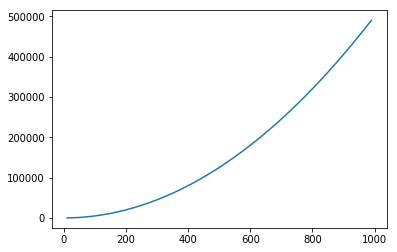

In [68]:
plt.plot(lengths, counters)
plt.show()

### 3.6 Bubble Sort

You should have seen a graph like this in the last screen:

![img alt](https://s3.amazonaws.com/dq-content/173/selection_sort_perf.png)

As you can see above, the graph has an exponential scale, meaning that it shows the sorting taking exponentially longer as the length of first_amounts increases. You can tell the scale is exponential from the 1e7 above the graph -- this indicates that each number on the y-axis should be multiplied by this amount. The __O(n^2)__ complexity makes selection sorts impractical for sorting large datasets.

In this screen, we'll take a look at another kind of sort, known as a __bubble sort__. A bubble sort is faster than a selection sort in some cases, and is also fairly straightforward to understand. A bubble sort works by making passes across an array and "bubbling" values until the sort is done. Here's an example:

```python
numbers = [5,4,3,1]
```
We first make a pass over the whole array. We swap pairs of adjacent elements if the one to the right is less than the one to the left. So we first swap 4 and 5:

```python
numbers = [4,5,3,1]
```
We then swap 5 and 3:

```python
numbers = [4,3,5,1]
```
We then swap 5 and 1:

```python
numbers = [4,3,1,5]
```
Our first pass is done. Since we made swaps in the first pass, we know that numbers isn't sorted, and we need a second pass. In the second pass, we swap 4 and 3:

```python
numbers = [3,4,1,5]
```
We then swap 4 and 1:

```python
numbers = [3,1,4,5]
```
We then don't make any more swaps, since 4 and 5 are in order. We now make a third pass, and we first swap 1 and 3:

```python
numbers = [1,3,4,5]
```
We don't make any more swaps in the third pass. Because we made swaps in the last pass, the bubble sort algorithm doesn't know if the values are sorted yet. We have to make a fourth pass across numbers (where we make no swaps). After making no swaps in an entire pass, we know numbers is sorted.

Here's a diagram of a bubble sort:

![img alt](https://s3.amazonaws.com/dq-content/173/bubble_sort.svg)

As you can see, the bubble sort:

    * Loops until no swaps were made in the previous pass
        * Loops across each element in the array.
            * If the current element is greater than the next element, swaps them.
            * Increments a swap counter.

Once we loop across the whole array without making any swaps, the sort is complete.

Here's an animation of a bubble sort, from __[Swfung8](https://commons.wikimedia.org/w/index.php?curid=14953478)__:

![img alt](https://s3.amazonaws.com/dq-content/173/Bubble-sort-example-300px.gif)


#### Instructions

* Create a function called bubble_sort that takes in an argument array.
    * Create a variable called swaps and assign the value 1 to it.
    * Loop while swaps is greater than 0.
        * Loop across all the elements in array up to the second to last one.
            * If the current element is greater than the next element, swap them.
            * Increment swaps when a swap is made.
* Assign the first 10 elements from amounts to first_amounts.
* Sort first_amounts with your function.

In [69]:
## still nested loop
## the difference is: outter loop is a while loop, indicating that the times of loop is not fixed.
## However, the worest case may be the same sa SELECTION SORT
### Face slap: other than one special case, where the array is sorted already, normally speaking, 
### Bubble Sort needs more operations than Selection Sort

def bubble_sort(array):
    swaps = 1 # initialize the first loop
    while swaps>0:
        swaps = 0 # initialize the actually counter
        for i in range(len(array)-1): # up to second to last one
            if array[i] > array[i+1]:
                swap(array, i, i+1)
                swaps += 1
    return array  ## since swap happens in-place, return is not necessary
                

In [70]:
first_amounts = amounts[:10]
bubble_sort(first_amounts)

[2.69, 3.67, 3.68, 4.99, 40.8, 69.99, 93.2, 123.5, 149.62, 378.66]

In [71]:
### range 的边界用途 (boundary condition)：
print(list(range(-1)))
print(list(range(0)))

[]
[]


In [72]:
a = []
b = [1]
c = [2,1]
print(bubble_sort(a))
print(bubble_sort(b))
print(bubble_sort(c))

[]
[1]
[1, 2]


In [73]:
#### Not getting into the loop ------ prevent from ERROR by leveraging this property of the For Loop
a = []
counter = 0
for i in range(-1):
    counter += 1
    print(a[i])
    
print(counter)

0


### 3.7 Profiling The Bubble Sort

We mentioned in the last screen that the bubble sort isn't especially high performance. In the __best case__ (when the array is already sorted in order), the performance is __O(n)__, since the algorithm only needs to make a single pass over the array to be sorted. In every other case, performance is __O(n^2)__, since multiple passes are required to sort. Thus, a bubble sort takes exponentially longer as the length of the array to be sorted increases. We typically refer to worst-case time complexity when we refer to time complexity, so we're using the worst case here.

The space complexity of a bubble sort is O(1), like a selection sort, since we aren't storing anything beyond a couple of counter and swap variables.

Let's __profile the bubble sort__ to __get a better handle of how it performs__. We can do this with an operation counter inside the for loop that loops over each element. We'll then be able to make a plot that shows the performance of the sort relative to the length of array.

#### Instructions

* Modify the bubble_sort function to:
    * Initialize counter with the value 0.
    * Add 1 to counter right inside the for loop.
    * Return counter.
* Create a list, counters.
* Loop across each length in lengths:
    * Assign the first length items in amounts to first_amounts.
    * Sort first_amounts with bubble_sort, and append the result to counters.
* Use the matplotlib.pyplot.plot function to plot lengths on the x-axis, and counters on the y-axis.
* What does the line plot tell you?
* Try varying the lengths and seeing what happens.

In [74]:
def bubble_sort(array):
    counter = 0
    swaps = 1
    while swaps>0:
        swaps = 0
        for i in range(len(array)-1):
            counter += 1
            if array[i]>array[i+1]:
                swap(array, i, i+1)
                swaps+=1
    return counter

In [75]:
lengths = [10, 100, 1000, 10000]
counters = []
for length in lengths:
    array = amounts[:length]
    counter = bubble_sort(array)
    counters.append(counter)
    
print(counters)

[72, 8514, 973026, 98140185]


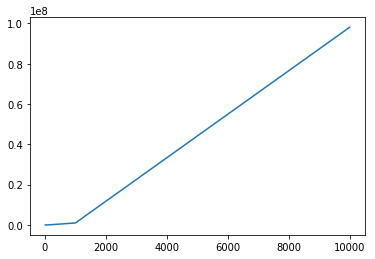

In [76]:
plt.plot(lengths, counters)
plt.show()

### 3.8 Insertion Sort

In the last screen, you should have seen a graph like this:

![img alt](https://s3.amazonaws.com/dq-content/173/bubble_sort_perf.png)

The above graph shows the performance of the bubble sort as more elements are added to first_amounts, and it shows that the number of operations performed go up exponentially as the number of elements in first_amounts increases. If you looked at the absolute numbers in counters, you should have noticed that they were higher than for the selection sort. Here they are side by side:

<table>
<tbody><tr>
<th>Length of Array</th>
<th>Operations for Selection Sort</th>
<th>Operations for Bubble Sort </th>
</tr>
<tr>
<td>10</td>
<td>55</td>
<td>72</td>
</tr>
<tr>
<td>100</td>
<td>5050</td>
<td>8514</td>
</tr>
<tr>
<td>1000</td>
<td>500500</td>
<td>973026</td>
</tr>
<tr>
<td>10000</td>
<td>50005000</td>
<td>98140815</td>
</tr>
</tbody></table>

Even though a bubble sort and a selection sort are __both O(n^2)__, __bubble sorts perform more operations in normal cases__.

In this screen, we'll look at an algorithm that's a bit more efficient that the selection sort and the bubble sort, the insertion sort. The insertion sort still doesn't perform extremely well on large datasets, but even small performance gains can be important. The insertion sort works by looping through each element in the array, and "inserting" it into a sorted list at the beginning of the array.

Here's an animation of an insertion sort, by __[Swfung8](https://commons.wikimedia.org/w/index.php?curid=14961606)__:

![img alt](https://s3.amazonaws.com/dq-content/173/Insertion-sort-example-300px.gif)


We'll also work through an example. Here's an array we want to sort:

```python
numbers = [3,4,1,5]
```
The beginning of the array is our "sorted" array, and the end contains the unsorted elements. We start by assuming that just the first element of the array is sorted. So we now try to sort 4. Since 4 is greater than 3, we leave it where it is:

```python
numbers = [3,4,1,5]
```
We now select 1 and try to sort it. Since 1 is less than 3 and 4, we put it in front of 3 and 4:

```python
numbers = [1,3,4,5]
```
We now select 5 and try to sort it. Since it's greater than 1, 3, and 4, we put it at the end of the sorted values:

```python
numbers = [1,3,4,5]
```
Here's a diagram of how the insertion sort algorithm works:

![img alt](https://s3.amazonaws.com/dq-content/173/insertion_sort_1.svg)

The trickiest part of the insertion sort is how it inserts elements into a given position. It shifts all the elements of the sorted portion of the array with values greater than the element to insert one to the right:

![img alt](https://s3.amazonaws.com/dq-content/173/inserting_element.svg)


The algorithm to insert a value is:

* Find the value you want to insert.
    * This is the value right after the sorted portion of the array
* Find the insertion point
    * This is the point right before the first value in the sorted array that's greater than the value you want to insert
* Starting with the value just to the left of the value you want to insert, swap each element greater than the value with the value
* After the swaps, the value will be in the right position

After we understand how insertion works, we can get to the full algorithm for an insertion sort. The full algorithm for an insertion sort is:

* Loop across each element in the array, starting with position 1 (skip the first element)
    * As long as the element is less than the one to the left (and there is an element to the left), swap the element with the element to the left
* After completing the swaps, the sort will be done


### 3.9 Insertion Sort

#### Instructions

* Create a function called insertion_sort that takes in an argument array.
    * Loop across each element in array, from position 1 to the end (loop variable i).
        * Assign the value of i to j.
        * Loop while j > 0 and the value to the left of the element at position j is greater than value at position j.
            * Swap the elements at position j - 1 and position j.
            * Subtract 1 from j.
* Assign the first 10 elements from amounts to first_amounts.
* Sort first_amounts with your function.

In [77]:
def insertion_sort(array):
    for i in range(1, len(array)):
        j = i
        while j>0 and array[j-1]>array[j]:
            ### j -= 1 wrong place !!!
            swap(array, j, j-1)       
            j -= 1

In [78]:
first_amounts = amounts[:10]
insertion_sort(first_amounts)
print(first_amounts)

[2.69, 3.67, 3.68, 4.99, 40.8, 69.99, 93.2, 123.5, 149.62, 378.66]


### 3.10 Profiling The Insertion Sort

We mentioned in the last screen that the insertion sort isn't especially high performance on large datasets. In the __best case__ (when the array is already sorted in order), the performance is __O(n)__, since the algorithm doesn't need to make any swaps, and only touches each element once. In every __other case__, performance is __O(n^2)__, since multiple passes are required to sort.

The insertion sort is usually used on smaller datasets, since it's more performant than more complex sorting algorithms on small arrays of up to __20__ elements. More complex sorting algorithms usually __divide__ the dataset up into pieces, and use the __insertion sort__ to sort the smaller pieces.

The __space complexity__ of an insertion sort is __O(1)__, like a selection or bubble sort, since we aren't storing anything beyond a couple of counter and swap variables.

Let's __profile the insertion sort to get a better handle of__ how it performs. We can do this with an operation counter inside the inner while loop. We'll then be able to make a plot that shows the performance of the sort relative to the length of array.

#### Instructions

* Modify the insertion_sort function to:
    * Initialize counter with the value 0.
    * Add 1 to counter right inside the inner while loop (that performs checks on j).
    * Return counter.
* Create a list, counters.
* Loop across each length in lengths:
    * Assign the first length items in amounts to first_amounts.
    * Sort first_amounts with insertion_sort, and append the result to counters.
* Use the matplotlib.pyplot.plot function to plot lengths on the x-axis, and counters on the y-axis.
* What does the line plot tell you?
* Try varying the lengths and seeing what happens.

In [79]:
def insertion_sort(array):
    counter = 0
    for i in range(1, len(array)):
        j = i
        while j>0 and array[j-1]>array[j]:
            counter += 1
            swap(array, j-1, j)
            j -= 1
    return counter

[28, 2386, 256121, 24134271]


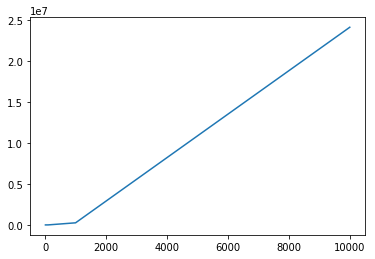

In [80]:
counters = []
lengths = [10,100,1000,10000]

for length in lengths:
    array = amounts[:length]
    counter = insertion_sort(array)
    counters.append(counter)
    
print(counters)

plt.plot(lengths, counters)
plt.show()

### 3.11 Comparing Sorting Algorithms

__[Why Insertion Sort performs a little bit better than Selection Sort???](https://stackoverflow.com/questions/15799034/insertion-sort-vs-selection-sort)__

    * Selction_sort: For Loop ===> For Loop
    * Bubble_sort: While Loop ===> For Loop
    * Insertion_sort: For Loop ===> While Loop
    
You should have seen a graph like this in the last screen:

![img alt](https://s3.amazonaws.com/dq-content/173/insertion_sort_perf.png)

Although the insertion sort also takes exponential time relative to the length of the input array, you'll notice that the total number of operations are lower than they were with the selection or bubble sorts. This makes the __insertion sort a good choice for sorting small arrays__, and it is commonly used in more complex sorting algorithms to sort small sublists. Here's a graph comparing all three algorithms:

![img alt](https://s3.amazonaws.com/dq-content/173/sort_comparison.png)

In future missions, we'll introduce the __merge sort__ and other recursive algorithms that divide the array into small pieces, which the insertion sort can then sort efficiently.

In this mission, we covered the implementations of various sorting algorithms. As we mentioned in the first screen, understanding the tradeoffs of different sorting algorithms and being able to implement them will help you in situations where custom sorting logic is needed. This is fairly common in scenarios when you're working with large or complex datasets.

In the next screen, we'll learn about search algorithms that search arrays for a value.


## 4. Searching Arrays and Lists (Searching Algorithms)
    * linear search/multiple_condition linear search
        * first matching
        * all matching
    * binary search

### 4.1 Searching Arrays

In the last mission, we learned about __sorting arrays__. Sorting is a very common operation when analyzing and viewing data, since it enables you to prioritize and group data and view it in a more readable format. Another common operation when working with data is searching. Imagine you have a list of employee records, and you want to find any records belonging to Susanne:

![img alt](https://s3.amazonaws.com/dq-content/173/searching+list.svg)

You can easily "eyeball" the result yourself, and see that Susanne is the final entry in the list of records. To perform the same kind of search in Python, you can use the __[list.index()](https://docs.python.org/3/tutorial/datastructures.html)__ method. The below code will return the index of the first occurrence of Susanne in employees.

```python
>> employees = ["Jim Thorpe", "Boris Yeltsin", "Horatio Alger", "Ada Lovelace", "Dilma Rousseff", "Susanne"]
>> employees.index("Susanne")
5
```
Although this search is relatively efficient, there are cases when you'll want to implement your own searching logic. Here are some example cases:

    * You want to find all occurrences of a term.
    * You have custom search logic across multiple fields in a row.
    * You have a data structure that doesn't have built-in search, like a linked list.
    * You want a higher-performance search algorithm for your use case.

Particularly in cases where you have a lot of data, implementing your own custom search logic is something you'll do often. Consider that a linear search takes O(n) time, which can add up if you need to do it often. Before we jump into performing some custom searches, let's discuss the dataset we'll be using in this mission, and do a basic search.

In this mission, we'll be using the same dataset from the last mission, which came from from here. Each row is a single credit card transaction, and each column contains attributes of that transaction. A credit card transaction is any time you use a credit card, for example in a coffee shop to buy coffee. We've removed a number of extraneous columns, which leaves us with just two -- Time and Amount:

    * Time -- the number of times the credit card used for this transaction has been used.
    * Amount -- the dollar amount of the transaction.


Here are the first few rows of the data:

<table class="dataframe">
<thead>
<tr>
<th></th>
<th>Time</th>
<th>Amount</th>
</tr>
</thead>
<tbody>
<tr>
<th>0</th>
<td>0.0</td>
<td>149.62</td>
</tr>
<tr>
<th>1</th>
<td>0.0</td>
<td>2.69</td>
</tr>
<tr>
<th>2</th>
<td>1.0</td>
<td>378.66</td>
</tr>
<tr>
<th>3</th>
<td>1.0</td>
<td>123.50</td>
</tr>
<tr>
<th>4</th>
<td>2.0</td>
<td>69.99</td>
</tr>
</tbody>
</table>

### 4.2 Searching Arrays

Use the __list.index()__ method to find the first|second instance of 4554 in times. Assign the result to first_4554.

In [81]:
import pandas as pd
import matplotlib.pyplot as plt

In [82]:
data = pd.read_csv('Data/amounts.csv')
amounts = data['Amount'].tolist()
times = data['Time'].astype('int32').tolist()

In [83]:
### How about the second 4554??
first_4554 = times.index(4554)
print(first_4554)

### second_4554 = times.index(4554, first_4554+1) if there do exist a second one

4988


### 4.3 Linear Search

The search that we did in the last screen, which is also the simplest kind of search, is called a __linear search__. You compare each element in a list to a value, and if there's a match, you return the value. Here's an example:

![img alt](https://s3.amazonaws.com/dq-content/173/searching+list_linear.svg)

Functionally, you:

    * Create a list of matches
    * Loop over each element in the array
        * Compare the element to the value you want to match on
        * If there's a match, append the index to the list of matches

If you've used list comprehensions before, you've likely done a form of a linear search, when you filtered for certain elements.

#### Instructions

* Write a function called linear_search that takes in two arguments -- array and search. It should:
    * Create an empty list, indexes.
    * Loop over each item in the array
        * If the item equals search, append the index of the item to indexes.
    * Return indexes.
* Run linear_search on times and search for 7. Assign the result to sevens.

In [84]:
def linear_search(array, search):
    indexes = [idx for idx in range(len(array)) if array[idx] == search]
    return indexes

In [85]:
sevens = linear_search(times, 7)
print(sevens)

[7, 8]


### 4.4 Searching Multiple Arrays

Although the linear search is fairly straightforward to implement, we can extend it to do more complex searching. For instance, we could use it to find rows where one column has one value, and another column has a different value. For example, let's say we're searching for employees by title and name:

![img alt](https://s3.amazonaws.com/dq-content/173/searching+list_multi_linear.svg)


In the above example, we're searching for an employee with the name __Susanne__ and the title __Lion Tamer__. We find a single match for both criteria.

Functionally, this looks like:

* Combine both arrays into a single array of arrays.
    * Think of each element in the combined array as a row.
    * The first element in each "inner" array should be the first column, the second should be the second column.
* Create a list of matches
* Loop over each element in the array
    * Compare the element to the values you want to match on
    * If there's a match, append the index to the list of matches

#### Instructions

* Write a function called linear_multi_search that takes in two arguments -- array and search. It should:
    * Create an empty list, indexes.
    * Loop over each item in the array
        * Check if the item equals search (search should also be an array)
        * If it does, append the index of the item to indexes
    * Return indexes.
* Combine times and amounts into one array called transactions
* Run linear_multi_search on transactions and search for 56, 10.84. Assign the result to results.

In [86]:
def linear_multi_search(array, search):
    indexes = [i for i in range(len(array)) if array[i] == search]
    return indexes

In [87]:
transactions = [[times[i], amounts[i]] for i in range(len(amounts))]
search = [56, 10.84]

In [88]:
results = linear_multi_search(transactions, search)

In [89]:
results

[88]

### 4.5 Profiling Linear Search

Given the name "Linear Search", it's not surprising that the time complexity of the search is linear, or O(n). You should have noted this in the previous screens, when the search had to "look" at each element once. If you want your search to find all the matching elements in an array, the time complexity is O(n). This is because the search has to iterate through all of the array elements to find all the potential matches.

If you're only looking for the first element that matches your search, the time complexity is a little more nuanced:

    * In the best case, when the item you want to find is first in the list, the complexity is O(1).
    * In the average case, when the item you want is in the middle of the list, the complexity is O(n/2), which simplifies to O(n).
    * In the worst case, when the item you want is at the end of the list, the complexity is O(n).

In most real-world cases, you'll want to iterate through the entire array to find all the matches, which makes the complexity O(n).

Linear searches for __multiple elements__ have __O(n) space complexity__, since every element in the array could potentially be a match in the worst case. For only the __first matching element__, the space complexity is __O(1)__, since there's only a single value to store.
    * first match - O(1)
    * all matches - O(n)

Note that we could __easily add more complex criteria to a linear search__. For example, if we have a list of employees, we could use a SQL query to find any employee that took 50 vacation days in the last year. This can potentially add more time complexity, but adds a lot of power.

Linear searches can also look for __fuzzy criteria__. For instance, you could easily find any transactions amounts between 100 and 150 instead of looking for a specific number.

#### Instructions

* Modify the linear_search function to:
    * Initialize counter with the value 0.
    * Add 1 to counter right inside the for loop.
    * Return counter instead of indexes
* Create a list, counters.
* Loop across each length in lengths:
    * Assign the first length items in amounts to first_amounts.
    * Search for 7 in first_amounts with linear_search, and append the result to counters.
* Use the matplotlib.pyplot.plot function to plot lengths on the x-axis, and counters on the y-axis.
* What does the line plot tell you?
* Try varying the lengths and seeing what happens.

In [90]:
''' ###usging enumerate()
def linear_search(array, search):
    counter = 0
    indexes = []
    for i, item in enumerate(array):
        counter += 1
        if item == search:
            indexes.append(i)
    return counter
'''

def linear_search(array, search):
    indexes = []
    counter = 0
    for i in range(len(array)):
        counter += 1
        if array[i] == search:
            indexes.append(i)
    return counter

[10, 100, 1000, 10000]


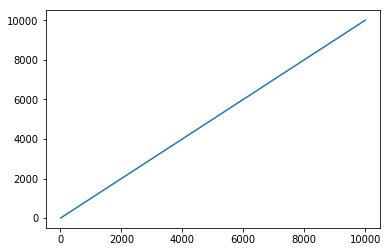

In [91]:
counters = []
lengths = [10, 100, 1000, 10000]
for length in lengths:
    first_amounts = amounts[:length]
    counter = linear_search(first_amounts, 7)
    counters.append(counter)
    
print(counters)
plt.plot(lengths, counters)
plt.show()

### 4.6 Binary Search

You should have seen a graph like this in the past mission, which confirms that linear search takes O(n) time in the worst case:

![img alt](https://s3.amazonaws.com/dq-content/173/linear_search_perf.png)

As you might expect from the past mission, there's a search algorithm that's more efficient than a linear search. It's called the binary search algorithm, and it typically runs much more quickly than linear search on larger datasets.

Let's say you have a list of numbers, and you have to find the number 100 in the list:

```python
numbers = [100,80,20,200,50]
```

Although it's fairly easy to find 100 in this list, let's say that the list is much longer (thousands of values). You might first put the values in order to make it easier:

```python
numbers = [20,50,80,100,200]
```

You might then look at the middle element of the list, 80, to see if it's less than or greater than the value you want. If it's less, you'll look at the top half of values. You then see 100 in the top half of values. We do this kind of segmentation automatically, to narrow down where an item in a list might be.

The binary search algorithm builds on this principle to quickly find values. Here's a diagram of a binary search:

![img alt](https://s3.amazonaws.com/dq-content/173/binary_search_alt.svg)


Note that we keep track of three values -- i, the position of the first element we want to include in the search, z, the position of the last element we want to include in the search, and m, the middle position within that range. Here's another look at how i, z, and m change:


![img alt](https://s3.amazonaws.com/dq-content/173/binary_search_alt2.svg)

We could write up a function to implement the binary search algorithm like this:

* Take in array and search
* Sort the array using an insertion sort.
* Set m to 0
* Set i to 0.
* Set z to the length of array minus 1.
* Loop while i <= z:
    * Find m using i and z
        * The mathematical floor of i + ((z - i) / 2)
    * If the value at position m equals search, exit the loop and return m
    * If the value at position m is less than search:
        * Set i to m+1
    * If the value at position m is greater than search:
        * Set z to m-1

As you can see, the algorithm keeps narrowing the window in which it searches until the actual value it's looking for is found. The binary search alghorithm is much more efficient than linear search since we don't need to look at every single value -- we just look at the midpoints of each range, which requires far fewer operations. The downside of binary search is that we need to sort the values beforehand, but we'll dive into profiling the performance of binary and linear search later.

Let's implement a binary search function.


#### __[Python Builtin Binary Search Algorithm ===> bisect](https://docs.python.org/3/library/bisect.html)__


### 4.7 Binary Search

* Write a function called __binary_search__ that takes in two arguments -- array and search. It should:
    * Follow the algorithm described earlier to implement binary search.
* Run binary_search on times and search for 56. Assign the result to result.

#### binary search ONLY fits for single element match??? 如果被搜索对象重复，还适用吗？

In [92]:
import math

def swap(array, pos1, pos2):
    store = array[pos1]
    array[pos1] = array[pos2]
    array[pos2] = store
    
def insertion_sort(array):
    for i in range(1, len(array)):
        j = i
        while j>0 and array[j-1]>array[j]:
            swap(array, j-1, j)
            j -= 1
    

'''
def binary_search(array, search):
    insertion_sort(array)
    m = 0
    i = 0
    z = len(array) - 1
    while i<= z:
        m = math.floor(i + ((z - i) / 2))
        if array[m] == search:
            return m
        elif array[m] < search:
            i = m + 1
        elif array[m] > search:
            z = m - 1
'''    
        
def binary_search(array, search):
    insertion_sort(array)
    lower_bound = 0
    upper_bound = len(array)-1
    index = (lower_bound + upper_bound)//2
    while lower_bound<=upper_bound:
        if array[index] == search:
            return index
        elif array[index] > search:
            upper_bound = index - 1
        elif array[index] < search:
            lower_bound = index + 1
        index = (lower_bound + upper_bound)//2
    return "Not Found"
    

In [93]:
result = binary_search(times, 56)
result

87

In [94]:
### for arrays with duplicated elements
import random
random.seed(123)
aa = [random.randint(0,19) for _ in range(20)]
index = binary_search(aa, 5)
print(aa)
print(index)
print(aa[index])

[1, 1, 1, 2, 3, 4, 5, 5, 7, 8, 8, 10, 10, 10, 10, 12, 13, 17, 17, 17]
6
5


### 4.8 Complex Criteria With Binary Search ===> String Comparison === 

We can do somewhat complex searches with binary search. One example is creating composite search values that you can then sort based on. For example, you can combine two columns and sort and search based on that:

![img alt](https://s3.amazonaws.com/dq-content/173/binary_multi_search.svg)

You'd then be able to sort the values in the Combined column, and perform a binary search on the combined values. This is because __strings can be sorted by converting each character to an integer value__, then sorting based on those integers. This also allows strings to be evaulated as being less than or greater than another string. Here's an example:

```python
"ba" > "aa" # returns True
```
The above code evaulates to True because the character b converts to a higher integer value than a. This matches with how we learned the alphabet, which places b after a. Here's another example:

```python
"ab" > "aa" # returns True
```
__The first character in each string is compared, then the second, and so on__. In this case, the second character of ab is greater than the second character of aa, even though the first characters are the same.

You can find a full list of character codes __[here](https://en.wikipedia.org/wiki/List_of_Unicode_characters)__, which will tell you which characters are "greater" than other characters.

For a binary search, the order doesn't matter as much as the fact that the values can be sorted into a consistent order. As long as the values are sorted, and the algorithm can compare values and figure out which one is greater, then the algorithm will be able to work properly.

#### Instructions

* Combine each pair of times and amounts values into a string.
    * Each string should look like 0_2.69.
    * Assign the result to transactions.
* Modify binary_search to use array.sort() instead of our insertion sort function.
* Use the binary_search function to search for 56_10.84 in transactions. Assign the result to result.


#### __[Builtin Sorting in Python ====> Timsort: O(nlogn)](https://en.wikipedia.org/wiki/Timsort)__
#### __[Python Sort Howto](https://docs.python.org/3/howto/sorting.html)__
    * list.sort()
    * sorted()

In [95]:
'''
transactions = ["{}_{}".format(times[i], amounts[i]) for i in range(len(amounts))]
'''
transactions = [str(times[i]) + '_' + str(amounts[i]) for i in range(len(amounts))]


In [96]:
def binary_search(array, search): ## what if search value not existing in the array at all?? --- not feedback from this function
    array.sort() ## Using the builtin List sorting method
    m = 0
    i = 0
    z = len(array) - 1
    while i<= z:
        m = math.floor(i + ((z - i) / 2))
        if array[m] == search:
            return m
        elif array[m] < search:
            i = m + 1
        elif array[m] > search:
            z = m - 1

In [97]:
result = binary_search(transactions, '56_10.84')
print(result)
print(transactions[result])

205929
56_10.84


### Fuzzy Matches With Binary Search

Just like we can with a __linear search__, we can also do fuzzy matching with a __binary search__. In this case, fuzzy matching means finding values within a certain range. In order to do this, we have to return the m value from the binary search (even if we don't find an exact match), then look at __the range of values "around" the m position__:

![img alt](https://s3.amazonaws.com/dq-content/173/binary_search_fuzzy.svg)

The process for the fuzzy binary search is:

* Perform a regular binary search, and return m, even if there isn't an exact match.
* Write a function that takes in the array, a lower value to search for, an upper value to search for, and m.
* Assign m to j.
* Assign m+1 to l.
* Assign an empty list to matches.
* While j is is greater than 0, and lower <= array[j] <= upper:
    * Add the value at position j to matches.
    * Subtract 1 from j.
* While l is is less than the length of the array, and lower <= array[l] <= upper:
    * Add the value at position l to matches.
    * Add 1 to l

When the procedure above is done, you'll have a list of all the fuzzy matches in the array.

#### Instructions

* Modify the binary_search function to return m, even if there's no exact match.
* Write a function called fuzzy_match that:
    * Takes in array, lower, upper, and m.
    * Uses the procedure from earlier to find a list of all fuzzy match values.
    * Returns the fuzzy matches.
* Find all the values in amounts between 100 and 200:
    * Run a binary_search across amounts looking for 150. Assign the result to m.
    * Run fuzzy_match across amounts with the range 100 to 2000. Assign the results to matches.
* Display matches -- what kind of pattern do you see in how the values were added to the list?

In [98]:
def binary_search(array, search):
    array.sort()
    m = 0
    i = 0
    z = len(array) - 1
    while i<= z:
        m = math.floor(i + ((z - i) / 2))
        if array[m] == search:
            return m
        elif array[m] < search:
            i = m + 1
        elif array[m] > search:
            z = m - 1
    return m ### return even if there is no exact match !!!

def fuzzy_match(array, lower, upper, m):
    indexes = []
    matches = []
    left = m
    right = m+1
    while left>=0 and lower <= array[left] <= upper: ### left>0 ?? or left>=0 ??
        indexes.append(left)
        matches.append(array[left])
        left -= 1
    while right<len(array) and lower <= array[right] <= upper:
        indexes.append(right)
        matches.append(array[right])
        right += 1
    return indexes, matches

In [99]:
import copy
amounts_copy = copy.deepcopy(amounts)
m = binary_search(amounts_copy, 150)
indexes, matches = fuzzy_match(amounts_copy, 100, 2000, m)

In [100]:
display(amounts[:10])
display(amounts_copy[:10])
print(len(indexes))
print(len(matches))
max(amounts)

[149.62, 2.69, 378.66, 123.5, 69.99, 3.67, 4.99, 40.8, 93.2, 3.68]

[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]

56709
56709


25691.16

In [101]:
###### Solutions from Dataquest
def binary_search(array, search):
    array.sort()
    m = 0
    i = 0
    z = len(array) - 1
    while i<= z:
        m = math.floor(i + ((z - i) / 2))
        if array[m] == search:
            return m
        elif array[m] < search:
            i = m + 1
        elif array[m] > search:
            z = m - 1
    return m ## return m even if there is no exact match for fuzzy match in next step

def fuzzy_match(array, lower, upper, m):
    j = m
    l = m + 1
    matches = []
    while j > 0 and lower <= array[j] <= upper:  ###### ???? j>=0??? 
        matches.append(array[j])
        j -= 1
        
    while l < len(array) and lower <= array[l] <= upper:
        matches.append(array[l])
        l += 1
    
    return matches

m = binary_search(amounts_copy, 150)
matches = fuzzy_match(amounts_copy, 100, 2000, m)

print(len(matches))

56709


### 4.10 Profiling Binary Search

As we saw in an earlier screen, binary search performs much better than a linear search, since __it doesn't have to touch every single element__ in an array. Let's take a closer look at just how a binary search performs by plotting its performance. We'll look at performance by:

    * Taking increasing numbers of items from a list (amounts)
    * Searching for a non-existent element in the lists (so we get the worst-case performance of the sort).

We'll construct shorter lists of 10, 100, 1000, and 10000 elements, like we did with linear search.

You may have noticed that there's a wrinkle with binary search -- we need to __sort the list beforehand__. This __imposes a penalty__ in terms of operations performed. We won't try to account for this right now to make it easier to see the performance of just the binary search, but we'll discuss it in the next screen.

#### Instructions

* Modify the binary_search function to:
    * Initialize counter with the value 0.
    * Add 1 to counter right inside the while loop.
    * Return counter.
* Create a list, counters.
* Loop across each length in lengths:
    * Assign the first length items in amounts to first_amounts.
    * Search for -1 in first_amounts with binary_search, and append the result to counters.
* Use the matplotlib.pyplot.plot function to plot lengths on the x-axis, and counters on the y-axis.
* What does the line plot tell you?
* Try varying the lengths and seeing what happens.

In [102]:
def binary_search(array, search):
    array.sort()
    counter = 0 # not including the operations in soring
    lower_bound = 0
    upper_bound = len(array)-1
    m = (lower_bound + upper_bound)//2
    while lower_bound<=upper_bound:
        counter += 1
        if array[m] == search:
            return m
        elif array[m] < search:
            lower_bound = m+1
        elif array[m] > search:
            upper_bound = m-1  
        m = (lower_bound + upper_bound)//2
    return counter  ## if not found the search ---- worst case

[3, 6, 9, 13]


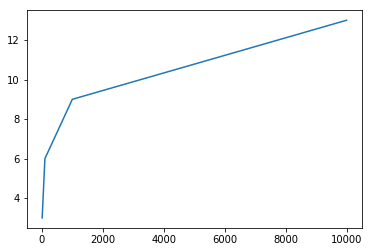

In [103]:
counters = []
lengths = [10, 100, 1000, 10000]

for length in lengths:
    first_amounts = amounts[:length]
    counter = binary_search(first_amounts, -1)   ### since -1 is not in the array
    counters.append(counter)

print(counters)
plt.plot(lengths, counters)
plt.show()

### 4.11 Profiling Binart Search With Sorting

You should have seen a graph on the last screen that looked something like this:

![img alt](https://s3.amazonaws.com/dq-content/173/binary_search_perf.png)


The above graph shows that binary search is very performant compared to a linear search! It takes less than 10 operations to scan through a 1000 element array to search for a value -- and that's in the worst case. Here's a comparison between linear and binary search:

![img alt](https://s3.amazonaws.com/dq-content/173/linear_binary_comp.png)

However, we didn't look at the true cost of the binary search, since we ignored the sort that came before the search. Let's try profiling binary search again, with an insertion sort that comes beforehand.

#### Instructions

* Modify insertion_sort to count up the number of operations:
    * Initialize a variable called counter set to 0.
    * Add 1 to counter inside the while loop.
    * Return counter.
* Modify binary_search to add the number of operations from insertion_sort to the number of operations for the binary search.
* Perform the same plotting from the last screen.

In [104]:
def swap(array, pos1, pos2):
    store = array[pos1]
    array[pos1] = array[pos2]
    array[pos2] = store

def insertion_sort(array):
    counter = 0
    for i in range(1, len(array)):
        j = i
        while j>0 and array[j-1]>array[j]:
            swap(array, j-1, j)
            j -= 1
            counter += 1
    return counter

def binary_search(array, search):
    counter = insertion_sort(array)
    lower_bound = 0
    upper_bound = len(array)-1
    while lower_bound<=upper_bound:
        counter += 1
        m = (lower_bound+upper_bound)//2
        if array[m] == search:
            return m
        elif array[m] < search:
            lower_bound = m+1
        elif array[m] > search:
            upper_bound = m-1
    return counter     

[48, 4943, 497584, 49622661]


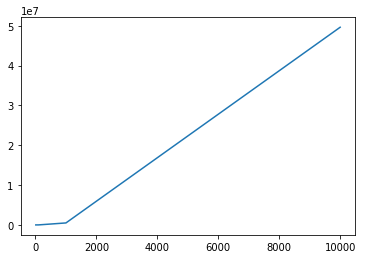

In [105]:
counters = []
lengths = [10, 100, 1000, 10000]

for length in lengths:
    # We sort in reverse order so we get the worst case performance of the insertion sort.
    first_amounts = sorted(amounts[:length], reverse=True)
    counter = binary_search(first_amounts, -1)   ### since -1 is not in the array
    counters.append(counter)

print(counters)
plt.plot(lengths, counters)
plt.show()

### 4.12 Linear Search VS Binary Search

You should have seen a graph that looked like this in the last screen:

![img alt](https://s3.amazonaws.com/dq-content/173/binary_search_sort_perf.png)

Even through the binary search is extremely fast, the slow O(n^2) sort slowed it down considerably. There are sorting algorithms that are much faster than an insertion sort, but they're still slower than a single linear search. Here's a comparison between a binary search with an insertion sort and a linear search:

![img alt](https://s3.amazonaws.com/dq-content/173/full_binary_linear_comp.png)

In general, you should use a __linear search__ if:

* You only need to search once.
* You don't need to sort the list for another reason (like viewing items in order).
* You have complex search criteria, or require external lookups.

You should use __binary search__ if:

* The data is already sorted, or you need to sort it for another reason.
* You need to perform multiple searches.
* You can distribute the sort across multiple machines, so it runs faster.

In most cases, you'll wind up using a binary search, but you'll need to find ways to make the sorting go faster, so you can run the search efficiently. In the coming courses, we'll discuss __distributed sorting__, and how to search as quickly as possible.

In the next mission, we'll cover a data structure that can make searching effectively instant called a __hash table__.

## 5. Hash Tables

### 5.1 Hash Tables

In the past few missions, we learned about arrays and how to sort and search them. We found that we could search for a value in an unsorted array in O(n) time using a linear search. But, there are many times when we want faster search performance than the O(n) time of a linear search, or even the O(log n) time of a binary search. For example, let's say we're working with the movie quotes dataset from the last course, which consists of quotes from the scripts of 1068 movies that constitute 894014 lines altogether, and take up 56 megabytes of disk space.

Let's say we want a way to quickly find all of the quotes associated with a single movie. We could do this by storing all of the quotes in an array, and then using linear or binary search to look for the title of the movie. The data structure would look like this:

```python
[
    ["theprincessbride", "Hello. My name is Inigo Montoya, you killed my father, prepare to die...."],
    ["xmen", "Man, what's the matter with you?..."],
    ["youvegotmail", "Good morning..."],
    ["watchmen", "A \"Have A Nice Day\" HAPPY FACE PIN. STEAM rises past the pin. We hear a..."],
    ...
]
```

We'd first sort the outer list, and then do a binary search across the first elements of each inner list to find the title of a movie (for example, xmen). We'd then be able to extract the quotes from the second element of the matching inner list. But, what if we wanted to search for the names of a movies 1000 times? Or 10000 times? In these cases, even a binary search would start to take a lot of time.

In cases like this we can use a __hash table__, which you know better in its implementation as a __Python dict__. A hash table allows us to store data with a key that is associated with a value. This allows us to look up a value using a key in __O(1)__ time. Here's how our data structure would look converted to a dict:

```python
{
    "theprincessbride": "Hello. My name is Inigo Montoya, you killed my father, prepare to die....",
    "xmen":"Man, what's the matter with you?...",
    "youvegotmail": "Good morning...",
    "watchmen": "A \"Have A Nice Day\" HAPPY FACE PIN. STEAM rises past the pin. We hear a...",
    ...
}
```

We can access the quotes of a single movie using just a key, like xmen. Because of how a hash table stores and retrieves data, this lookup takes O(1) time.

In this mission, we'll implement our own hash table, and use it to store and look up data. There is a Python implementation of a hash table in the dict class, but __creating your own__ will help you understand the __performance tradeoffs__. Additionally, you'll need to implement your own hash table in cases where you want additional performance, or where you're working across multiple machines. In cases like this, several machines may be processing data, and storing it to centralized hash table. This requires custom logic not available in a default Python dictionary. __Custom hash tables__ are also useful when you're tuning for different performance characteristics than the Python implementation.

Before we dive into how to implement a hash table, let's load in and explore our dataset. As we mentioned earlier, we have lines from 1068 movies. The lines are either __[IMDB](https://www.imdb.com/)__ memorable quotes, or lines surrounding memorable quotes. The number of lines we have for each movie doesn't necessarily correspond to the length of the movie. The dataset originally came from __[Cornell](https://www.cs.cornell.edu/~cristian/Cornell_Movie-Dialogs_Corpus.html)__, but has been modified to be easier to work with.

The dataset consists of __1068__ different text files, one for each movie. All of the files are stored in the folder __lines__. Each text file contains all of the lines we have for the movie, separated by a newline character (\n). Here's an example for __[The Princess Bride](https://www.imdb.com/title/tt0093779/)__, which is an excerpt from __theprincessbride.txt__:

```python
Hello. My name is Inigo Montoya, you killed my father, prepare to die.
Hello. My name is Inigo Montoya. You killed my father. Prepare to die.
Stop saying that!
```

### 5.2 Hash Tables

* Loop over each file in the __lines__ directory, and for each file:
    * Read the data in the file into a string variable.
    * Assign the data in the file to a dictionary key in quotes.
        * The key should be the name of the file without the .txt suffix.
* When you're done, each key should be the name of a movie, and each value should be the IMDB memorable quotes from that movie.

In [106]:
with open('Data/amounts.csv') as f:
    data = f.readlines()
    f.readlines?

In [107]:
import os
display(os.listdir())
display(os.path)

['.ipynb_checkpoints',
 '1.1 Guided Project - Storing Storm Data - PostgreSQL.ipynb',
 'Data',
 'Guided Project - Hacker News Pipeline & Git Bash - winpty.ipynb',
 'pipeline.py',
 'Pythonic - containor - iterable - iterator - generator.ipynb',
 'Step 2.2 Optimizing Code Performance On Large Datasets.ipynb',
 'Step 2.3 Algorithms And Data Structures (appendix - python datetime objects).ipynb',
 'Step 2.4 Recursion and Trees.ipynb',
 'Step 3 - Building a Data Pipeline.ipynb',
 'stop_words.py',
 'summarized.csv',
 'temporary.csv',
 '__pycache__']

<module 'ntpath' from 'C:\\Miniconda3\\lib\\ntpath.py'>

In [108]:
'''
import os
quotes = {}

directory = 'lines'
for filename in os.listdir(directory):
    with open(os.path.join(directory, filename)) as f:
        quotes[filename.replace(".txt", "")] = f.read()
'''
print('This is how we can read files in a folder by a loop')
print('But, where is the "lines" folder?')

This is how we can read files in a folder by a loop
But, where is the "lines" folder?


### 5.3 Hash Functions

You may be surprised to learn that hash tables store their data in arrays. Think of an array as the base onto which more complicated data structures can be built. Here's how a hash table that was just initialized might look:

![img alt](https://s3.amazonaws.com/dq-content/176/hash_table_init.svg)

As you can see above, this hash table has 6 positions in which to store data, and since it was just initialized, they all hold the value None. In order to assign values to a position in the array, we have to figure out how to map between keys like xmen and positions in the array, like 1:

![img alt](https://s3.amazonaws.com/dq-content/176/hash_table_array.svg)

In the above diagram, we want to store some data associated with the key xmen. We pass xmen into a function (represented as ???? in the diagram), which returns 1, the position in the array where we should store the value. __The function that maps from xmen to the position 1 is known as a hash function__. A hash function will always return the same output with the same input. So every time we pass in xmen, we get the position 1. This allows us to store data in a position using a key, then retrieve it using the same key.

Here's how storing and retrieving data would look in the console:

```python
>> hash_table = [None, None, None, None, None, None]
>> position = hash("xmen")
>> position
1
>> hash_table[position] = "Man, what's..."
>> hash_table
[None, "Man, what's...", None, None, None, None]
>> lookup_position = hash("xmen")
>> lookup_position
1
>> hash_table[lookup_position]
"Man, what's..."
```

As you can see, we always get the position in the array to insert or lookup a value when we pass a key into the hash function. We can __create a simple hash function by using the built-in __[ord()](https://docs.python.org/3/library/functions.html#ord)__ function__. The ord() function returns an integer character code corresponding to a unicode character. If you don't recall how unicode works, you can read more about it __[here](https://docs.python.org/3/howto/unicode.html)__. Each character has a unique integer code:

```python
>> ord("a")
97
>> ord("(")
40
```

This allows us to __quickly convert single characters to integers__. To simplify the hashing process, we'll only take into account the first character of a potential dictionary key. This will cause issues when storing multiple keys with the same first letter, but we'll cover how we'll solve this problem later in the mission.

#### Instructions

* Fill out the body of the __simple_hash__ function:
    * Convert the input to a string (this allows us to also use integer and float keys)
    * Extract the first character of the string.
    * Use the __ord()__ function to get the character code of the first character.
    * Return the character code.
* Assign the result of calling simple_hash on the string __xmen__ to __xmen_hash__.
* Assign the result of calling simple_hash on the string __10thingsihateaboutyou__ to __things_hash__.


#### Howto - Unicode
#### Python Builtin Hash Function


In [109]:
'''
def simple_hash(key):
    key = str(key)
    return ord(key[0])
'''
print('a simple hash function')

a simple hash function


### 5.4 Fitting Values Into An Array

__One complication with__ creating a hash table is assigning a __fixed size__ to the array that stores the data. For example, let's say we use the hash function we created in the last screen, simple_hash, to hash Z:

```python
>> def simple_hash(key):
..    key = str(key)
..    return ord(key[0])
..
>> simple_hash('Z')
90
```

We get 90 as a result, which means we have to store the value associated with the key Z at index 90 in an array. But what if we only initialized the array to have 10 elements?

In cases like this, we need to apply a __modulo operator__. A modulo is a mathematical operator that finds the remainder after a number is divided by another. A modulo tries to fit one number into another as many times as possible, then takes the remainder:

![img alt](https://s3.amazonaws.com/dq-content/176/modulo_remainder.svg)

In the above example, 2 * 2 is 4, but 2 * 3 is 6, which is greater than 5. So we can only fit 2 into 5 twice, and we have a remainder of 1. We can perform a modulo in Python using %. For example:


```python
>> 11 % 10
1
>> 10 % 10
0
>> 12 % 11
1
>> 23 % 2
1
```

Let's walk through an example of what the modulo operator does. Let's say we want to find 184 modulo 3. Here's what we'd do:

* Set dividend to 184.
* Set divisor to 3.
* Set total to 0.
* While total is less than dividend - divisor:
    * Add divisor to total.
* The remainder is dividend - total.

The above algorithm will end with total equal to 183, and the remainder will be 1.

A modulo operator __has the effect of ensuring that__ the returned value can __never be greater than the divisor__. In the above example, no number modulo 3 can ever have a remainder greater than 2. Using a modulo operator on the value returned by our hash function ensures that the index returned is never larger than the size of our array. We simply __use the size of our array as the divisor__ when we use the modulo operator.

#### Instructions

* Add to the body of the simple_hash function:
    * Prior to returning the character code, apply the modulo operator with the divisor 20.
* Assign the result of calling simple_hash on the string xmen to xmen_hash.
* Assign the result of calling simple_hash on the string 10thingsihateaboutyou to things_hash.

#### modul0 ===> returned value can never be greater than the divisor !!!! (Property)
#### any_number % 1 = 0    =====> to create the worst case in a hashtable

In [110]:
def simple_hash(key):
    key = str(key)
    code = ord(key[0])%20 ## Assuming the size of the array is 20
    return code

xmen_hash = simple_hash("xmen")
things_hash = simple_hash('10thingsihateaboutyou')
print(xmen_hash)
print(things_hash)

0
9


### 5.5 Creating A Hash Table

Now that we've created a simple hash function, we have all the pieces we need to create a __HashTable__ class. The class will allow for setting and getting values from an instance. You may recall from a previous mission that we overrode the __[object.\_\_getitem\_\_()](https://docs.python.org/3/reference/datamodel.html#object.\_\_getitem\_\_)__ and __[object.\_\_setitem\_\_()](https://docs.python.org/3/reference/datamodel.html#object.\_\_setitem\_\_)__ methods to get this functionality for an Array class:

```python
class Array():
    def __init__(self, size):
        self.array = np.zeros(size, dtype=np.float64)
        self.size = size
​
    def __getitem__(self, key):
        return self.array[key]
​
    def __setitem__(self, key, value):
        self.array[key] = value
```

Our HashTable class will be slighly more complex, since we need to hash the key prior to storing the value in our array, or looking up the value.

In the __\_\_getitem\_\___ method, we'll need to:

    * Hash the key
    * Return the value in our array corresponding to the hashed position

In the __\_\_setitem\_\___ method, we'll need to:

* Hash the key
* Set the value at the hashed position equal to the value passed in

We'll also need to use the __[numpy.object](https://docs.scipy.org/doc/numpy/reference/arrays.dtypes.html)__ datatype when initializing our array, which will allow us to store any kind of Python objects in the NumPy array that we create, including strings.

#### Instructions

* Fill out the methods in the HashTable class.
    * __\_\_init\_\___ should create an array using numpy, as with our Array class.
        * Use the dtype np.object when initializing the array, so we can store Python objects like strings.
    * __\_\_getitem\_\___ should return a value from the array when a key is passed in.
    * __\_\_setitem\_\___ should store a value in the array based on the key.
* Initialize an instance of HashTable called hash_table with an array of size 20.
* Set the key xmen in hash_table equal to the contents of __lines/xmen.txt__.

In [111]:
import numpy as np

def simple_hash(key):
    key = str(key)
    code = ord(key[0])
    return code % 20

class HashTable():
    
    def __init__(self, size):
        self.array = np.full(size, None, dtype=np.object)   ## np.zeros ? np.full ?
        self.size = size
    
    def __getitem__(self, key):
        code = simple_hash(key)
        return self.array[code]
    
    def __setitem__(self, key, value):
        code = simple_hash(key)
        self.array[code] = value

'''
with open('lines/xmen.txt', 'r') as f:
    hash_table['xmen'] = f.read()
'''
        
hash_table = HashTable(20)


### 5.6 Hash Collisions

You may have noticed in the past few screens that our simple hash function returns the same index for many values. For example:

```python
>> simple_hash("xmen")
0
>> simple_hash("xray")
0
```

When the same hash results from two different values, it's known as a __hash collision__. Our hash collisions happen for 2 reasons:

    * We only have 20 positions in our array, so we used the modulo operator to compress the range of our array positions
    * We're only hashing based off of the first character in each string, so if the first character is the same, the strings are treated the same.
    
The first problem is the bigger one. For example, when we try to store values associated with 5 keys into 3 array positions, here's what happens:

![img alt](https://s3.amazonaws.com/dq-content/176/hash_table_compress.svg)

As you can see, if we have more hash table keys than positions, some keys point to the same array position. Because a key can be any string, we can effectively have infinite keys. We can't allocate an infinitely long array, so we need to find a way to manage hash collisions. If we don't, we can get unexpected results like this:

```python
>> hash_table["xmen"] = "Wolverine"
>> hash_table["xray"] = "Superman"
>> hash_table["xmen"]
Superman
>> hash_table["xray"]
Superman
```

As you can see above, unless we deal with hash collisions, they result in older keys __being overwritten__ by newer ones that hash to the same array position.

In order to manage collisions, we need to __deal with both how we store values, and how we retrieve values__. We'll deal with storage first.

One way to avoid collisions is to store a list of values at each array position, like this:

![img alt](https://s3.amazonaws.com/dq-content/176/hash_table_list.svg)

This allows each position in the array to store multiple values, so we aren't overwriting previous values with the new ones.

#### Instructions

* Modify the \_\_setitem\_\_ method of the HashTable class.
    * Hash key using simple_hash and get a position.
    * If the value in the array at position isn't a list, initialize it to an empty list.
    * Append value to the list.
* Initialize an instance of HashTable called hash_table with an array of size 20.
* Set the key xmen in hash_table equal to the contents of lines/xmen.txt.
* Set the key xmenoriginswolverine in hash_table equal to the contents of lines/xmenoriginswolverine.txt.

In [112]:
class HashTable():
    
    def __init__(self, size):
        self.array = np.zeros(size, dtype=np.object)
        self.size = size
    
    def __getitem__(self, key):
        ind = simple_hash(key)
        return self.array[ind]
    
    def __setitem__(self, key, value):
        ind = simple_hash(key)
        if not isinstance(self.array[ind], list):
            self.array[ind] = []
        self.array[ind].append(value)

'''
with open("lines/xmen.txt", 'r') as f:
    hash_table["xmen"] = f.read()

with open("lines/xmenoriginswolverine.txt", 'r') as f:
    hash_table["xmenoriginswolverine"] = f.read()
    
len(hash_table["xmen"])
hash_table["xmen"]
'''
hash_table = HashTable(20)

### 5.7 Retrieving Values From Hash Tables

You may have noticed in the past screen that we don't have an easy way to look up the values after we insert them into the array. __The order__ that a value will take in an inner list __depends on when it was added__. For example:

```python
>> hash_table = HashTable(20)
>> hash_table["xmen"] = "Wolverine"
>> hash_table["xmenoriginswolverine"] = "Superman"
>> hash_table["xmen"]
["Wolverine", "Superman"]
>> hash_table = HashTable(20)
>> hash_table["xmenoriginswolverine"] = "Superman"
>> hash_table["xmen"] = "Wolverine"
>> hash_table["xmen"]
["Superman", "Wolverine"]
```

Right now, looking up the value associated with a key returns all the keys in the list at that array position. It's also impossible to tell which value is associated with a particular key. In the above example, you don't know if Superman or Wolverine are associated with the key xmen.

In order to fix this, we need to:

* In \_\_setitem\_\_, store both the key and the value.
* In \_\_getitem\_\_, iterate through each key value pair at the array position to find the correct value.

Here's how this would look when storing values:

![img alt](https://s3.amazonaws.com/dq-content/176/hash_table_tuples.svg)


As you can see, each element in the array __becomes a list of tuples__. Each tuple contains the key and the value. When we're looking up the value associated with a key, we then:

* Hash the key to get the position.
* Iterate through each tuple in the list at the array position:
    * If the key matches the key passed in, return the value.

#### Instructions

* Modify \_\_setitem\_\_ to:
    * Hash key using simple_hash and get a position.
    * If the value in the array at position isn't a list, initialize it to an empty list.
    * Append a tuple containing the key and the value to the list.
* Modify \_\_getitem\_\_ to:
    * Hash key using simple_hash and get a position.
    * Retrieve the list at position in the array, and iterate through each tuple in the array:
        * If the first element of the tuple matches key, return the second element of the tuple.
* Initialize an instance of HashTable called hash_table with an array of size 20.
* Set the key xmen in hash_table equal to the contents of lines/xmen.txt.
* Set the key xmenoriginswolverine in hash_table equal to the contents of lines/xmenoriginswolverine.txt.

In [113]:
class HashTable():
    
    def __init__(self, size):
        self.array = np.zeros(size, dtype=np.object)
        self.size = size
    
    def __getitem__(self, key):
        ind = simple_hash(key)
        for k, v in self.array[ind]:
            if k == key:
                return v
    
    def __setitem__(self, key, value):
        ind = simple_hash(key)
        if not isinstance(self.array[ind], list):
            self.array[ind] = []
        self.array[ind].append((key, value))
        

'''
with open("lines/xmen.txt", 'r') as f:
    hash_table["xmen"] = f.read()

with open("lines/xmenoriginswolverine.txt", 'r') as f:
    hash_table["xmenoriginswolverine"] = f.read()
'''
    
hash_table = HashTable(20)

### 5.8 Overwriting Values

You may have noticed that there's a flaw with our hash table when it comes time to assign new values to an existing key. For example:

```python
>> hash_table = HashTable(20)
>> hash_table["xmen"] = "Wolverine"
>> hash_table["xmen"] = "Superman"
>> hash_table["xmen"]
"Wolverine"
```

We're appending values to the list like this in \_\_setitem\_\_:

![img alt](https://s3.amazonaws.com/dq-content/176/hash_table_overwrite_1.svg)


When we then retrieve these values in \_\_getitem\_\_, we get the __earliest value associated with a key__:

```python
def __getitem__(self, key):
    ind = simple_hash(key)
    for k,v in self.array[ind]:
        if key == k:
            return v
```

This means that although we append the new value, Superman, to the list at an array position in \_\_setitem\_\_, we don't retrieve it in \_\_getitem\_\_.

There are two ways to solve this:

    * Iterate from the back of the list at the array position to the front in \_\_getitem\_\_, so we get the latest value associated with a key instead of the earliest.
    * In \_\_setitem\_\_, iterate through the list at the array position, and replace the current value with a new one.

The first way above keeps appending new entries to the list, which consumes more memory, and causes slower indexing, since there are potentially more items to iterate through. The second way above makes insertion slower, since you need to perform a linear search, but it also makes indexing faster, and uses less memory. Because of the advantages, and the fact that dictionaries are usually indexed more than they're inserted into, it usually __makes more sense to use the second method__ above.
   
    * tradeoff: space vs time:
        * first ==> more memory (space)
        * second ===> more time (time)

#### Instructions

* Modify \_\_setitem\_\_ to:
    * Hash key using simple_hash and get a position.
    * If the value in the array at position isn't a list, initialize it to an empty list.
    * Set replace to None.
    * Iterate through each tuple in the list in the array at position:
        * If the first item in the tuple matches key, store the position in replace.
    * If replace is None, append a tuple containing the key and the value to the list.
    * If replace isn't None, replace the tuple at position replace in the array with the new (key,value) tuple.
* Initialize an instance of HashTable called hash_table with an array of size 20.
* Set the key xmen in hash_table equal to the contents of lines/xmen.txt.
* Set the key xmen in hash_table equal to the contents of lines/xmenoriginswolverine.txt.



In [114]:
class HashTable():
    
    def __init__(self, size):
        self.array = np.zeros(size, dtype=np.object)
        self.size = size
    
    def __getitem__(self, key):
        ind = simple_hash(key)
        for k,v in self.array[ind]:
            if key == k:
                return v
    
    def __setitem__(self, key, value):
        ind = simple_hash(key)
        if not isinstance(self.array[ind], list):
            self.array[ind] = []
        replace = None
        for i, t in enumerate(self.array[ind]): ## i - index; t - tuple
            if t[0] == key:
                replace = i
        if replace == None:
            self.array[ind].append((key,value))
        else:
            self.array[ind][replace] = (key, value)
            

'''
with open("lines/xmen.txt", 'r') as f:
    hash_table["xmen"] = f.read()

with open("lines/xmenoriginswolverine.txt", 'r') as f:
    hash_table["xmen"] = f.read()
'''
    
hash_table = HashTable(20)

### 5.9 Profiling Hash Tables

As you may have realized, the fact that we're now storing a list at each array position means that we have to iterate through the list to find the element we want. This means the __theoretical worst case time complexity is O(n)__, when __all__ the elements in the hash table are __in a single list__:

![img alt](https://s3.amazonaws.com/dq-content/176/hash_table_scan.svg)

In the above example, the lookup would have to scan through 2 elements to find a match, making the lookup O(n). We can also have two elements in an array, but not have the lookup be O(n):

![img alt](https://s3.amazonaws.com/dq-content/176/hash_table_scan_1.svg)

As you can see, the __worst case__ time complexity is when __all of the hash table keys and values are stored in a single array position__. In cases like this, you have to perform a linear search to locate the value. Let's test this principle out by:

    * Creating a HashTable instance __with only one available array position__. <worst case>
    * Using counters to count the number of operations needed to retrieve values.

#### Instructions

* Modify \_\_getitem\_\_:
    * Create a variable called counter at the top.
    * Increment counter by 1 for each loop iteration.
    * Return counter instead of k.
* Create an instance of the HashTable class called hash_table with array size 1.
* Loop across data, and for each tuple:
    * Use the first element of the tuple as a key, and insert the second element of the tuple into hash_table.
* Use the last key in data to look up the value in hash_table. Assign the result to counter.
* Inspect counter in the variables inspector. Why do you think it takes on the value it does?
* Add values to data, and see what happens to counter.

In [115]:
def simple_hash(key):
    key = str(key)
    code = ord(key[0])
    return code % 1 ##### to create the worst case, where all keys in one single position

In [116]:
### original
class HashTable:
    def __init__(self, size):
        self.array = np.full(size, None, dtype=np.object)
        self.size = size
        
    def __getitem__(self, key):
        position = simple_hash(key)
        for k, v in self.array[position]:
            if k == key:
                return v
        
    def __setitem__(self, key, value):
        position = simple_hash(key)
        if not isinstance(self.array[position], list):
            self.array[position] = []
        replace = None
        for i, t in enumerate(self.array[position]):
            if t[0] == key:
                replace = i
        if replace is None:
            self.array[position].append((key, value))
        else:
            self.array[position][replace] = (key, value)
        

In [117]:
## Modified for profiling
class HashTable:
    def __init__(self, size):
        self.array = np.full(size, None, dtype=np.object)
        self.size = size
        
    def __getitem__(self, key):
        counter = 0
        position = simple_hash(key)
        for k, v in self.array[position]:
            counter += 1
            if k == key:
                return counter
        
    def __setitem__(self, key, value):
        position = simple_hash(key)
        if not isinstance(self.array[position], list):
            self.array[position] = []
        replace = None
        for i, t in enumerate(self.array[position]):
            if t[0] == key:
                replace = i
        if replace is None:
            self.array[position].append((key, value))
        else:
            self.array[position][replace] = (key, value)

In [118]:
data = [
    ("xmen", "Wolverine"), 
    ("xmenoriginswolverine", "Superman"), 
    ("vanillasky", "Thor"), 
    ("tremors", "Aquaman")
]

hash_table = HashTable(1) ## worst case, only one position avaiable, all keys in the same slot. ===> O(n)

for k, v in data:
    hash_table[k] = v
    
counter = hash_table["tremors"]
print(counter)

4


In [119]:
hash_table.array[0]

[('xmen', 'Wolverine'),
 ('xmenoriginswolverine', 'Superman'),
 ('vanillasky', 'Thor'),
 ('tremors', 'Aquaman')]

### 5.10 Profiling Array Length ==> tradeoff: Time vs Space
#### More space mean less hash collision

We can __improve the time complexity by increasing the size of the array__, and improving our hashing algorithm. If we improve our hashing algorithm, we decrease the chance that two strings map to the same array position. Currently, our hashing algorithm assigns keys to positions based on the first letter, which only allows us to use a few array positions. For example, if all of our potential dictionary keys were strings starting with lowercase letters from a to z, we'd only be able to utilize 26 array positions, since our keys only hash to 26 possible numbers.

Instead, we'll upgrade our hashing algorithm to use the __[built-in Python hash() function](https://docs.python.org/3/library/functions.html#hash)__, which is used by Python's built-in hash table implementation, __[dict](https://docs.python.org/3/tutorial/datastructures.html#dictionaries)__. This algorithm will allow us to hash based on the __entire string__, not just the first character, and will allow us to utilize longer arrays. By using longer arrays, we can __make hash collisions less likely__, which will give us a speed boost when it comes to insertion and lookups, since we don't need to iterate over as many list values.

#### Instructions

* Swap out the simple_hash function for the hash function.
    * Make sure to use a modulo operator to reduce the maximum hash to the array length minus 1.
* Fill in the rest of profile_table:
    * Insert a line at the beginning that gets the time, and assigns to start.
    * Insert a line at the end that gets the difference between the current time and start. Assign to duration.
    * Return duration.
* Create a list, times.
* Loop across each length in lengths:
    * Run profile_table, and pass in length. Append the result to times.
* Use the matplotlib.pyplot.plot function to plot lengths on the x-axis, and times on the y-axis.
* What does the line plot tell you?
* Try varying the lengths and seeing what happens.

In [120]:
class HashTable():
    
    def __init__(self, size):
        self.array = np.zeros(size, dtype=np.object)
        self.size = size
    
    def __getitem__(self, key):
        ind = hash(key) % self.size  ### magic of modulo ===> reduce the maximumu hash at will
        for k,v in self.array[ind]:
            if key == k:
                return v
    
    def __setitem__(self, key, value):
        ind = hash(key) % self.size  ### magic of modulo ===> reduce the maximumu hash at will
        if not isinstance(self.array[ind], list):
            self.array[ind] = []
        replace = None
        for i,data in enumerate(self.array[ind]):
            if data[0] == key:
                replace = i
        if replace is None:
            self.array[ind].append((key,value))
        else:
            self.array[ind][replace] = (key, value)
'''
def profile_table(size):
    start = time.time()
    hash_table = HashTable(size)
    directory = "lines"
    
    for filename in os.listdir(directory):  ### around 1000 movies
        name = filename.replace(".txt", "")
        hash_table[name] = quotes[name]
    
    duration = time.time() - start
    return duration

lengths = [1,10,20,30,40,50]
times = []
for l in lengths:
    times.append(profile_table(l))

plt.plot(lengths, times)
'''

print('space-time tradeoff')

space-time tradeoff


### 5.11 Hash Tables Versus Lists

You should have seen a plot like this in the last screen:

![img alt](https://s3.amazonaws.com/dq-content/176/profile_table.png)

As you can see, as we increase the array size, the __insertion time decreases__. This is __only true to a point__, though. Once every key hashes to a unique array position, then we can't reduce our insertion time anymore. The tradeoff to increasing the array size is that some of the positions will likely be unfilled, which increases our memory usage.

The Python dict class is implemented slightly differently that our implementation, to optimize for speed, but the same general principles apply:

* Insertion is generally O(1), but worst-case can be O(n).
* Indexing is generally O(1), but worst-case can be O(n).

You can read more about the Python dictionary implementation __[here](http://www.laurentluce.com/posts/python-dictionary-implementation/)__. Dictionaries are excellent in cases when we want to do quick searches based on keys. The tradeoff for this is __slightly higher memory usage__. When working across multiple machines, a dictionary is an excellent data structure since hash tables can __be combined fairly easily__. It's very commonly used when doing __distributed computation__, and understanding the memory and lookup time constraints can be vert helpful.

The next mission will be a guided project where you'll __pull together__ what you've done with data structures to work with stock prices.


#### How hash table could used in Distributed Computation ???
* __[video](https://www.coursera.org/lecture/data-structures/distributed-hash-tables-tvH8H)__

#### How to easily combine two hash tables ???

## Appendix Understanding "datetime" module in Python

* __[python中的datetime模块详解](https://www.jianshu.com/p/113bd56f7b56)__
* __[python中的时间处理总结 - 无总结， 不进步](https://www.jianshu.com/p/a035a564b248?utm_campaign=maleskine&utm_content=note&utm_medium=seo_notes&utm_source=recommendation)__
* __[official doc](https://docs.python.org/3/library/datetime.html#datetime-objects)__

* __[time module](https://docs.python.org/3/library/time.html#module-time)__
    * epoch - Unix
    * UTC vs GMT
    * time.time() in seconds
    
### 1. "datetime" module: 2 constances and 7 classes
    ```python
    import datetime
    dir(datetime)
    [attr for attr in dir(datetime) if not attr.startswith('__')]
    ```
    * 'MAXYEAR': constant = 9999
    * 'MINYEAR': constant = 1
    * 'date': class
    * 'datetime': class
    * 'datetime_CAPI': class
    * 'time': class
    * 'timedelta': class
    * 'timezone': class
    * 'tzinfo': class

### 2. "datetime.timedelta" class
    ```python
    [attr for attr in dir(datetime.timedelta) if not attr.startswith("__")]
    
    ['days', 'max', 'microseconds', 'min', 'resolution', 'seconds', 'total_seconds']
    ```
    * 6 attributes, 1 class methods - total_seconds
    * default parameters: days, seconds, microseconds
    * value range for the three default parameters:
        * 0 <= microseconds < 1000000
        * 0 <= seconds < 3600*24 (一天的秒数)
        * -999999999 <= days <= 999999999
    * max, min attribute could display the above value range
        * datetime.timedelta.max ---> datetime.timedelta(999999999, 86399, 999999)
        * datetime.timedelta.min ---> datetime.timedelta(-999999999)
    * days, seconds, microseconds: 获取各自取值
    * total_seconds(): 获取总时间 - in terms of seconds 
    
    ```python
    Example: creating an instance out of "datetime.timedelta" class
    tmp = datetime.timedelta(days=30, seconds=3600)
    tmp.days -> 30
    tmp.seconds -> 3600
    tmp.microseconds -> 0
    tmp.total_seconds() -> 2595600.0
    ```
### 3. "datetime.datetime" class --> date 和 time 的结合 -- QQQ why not in capital form as a class??
```python
[attr for attr in dir(datetime.datetime) if not attr.startswith("__")]

['astimezone', 'combine', 'ctime', 'date', 'day', 'dst', 'fold', 'fromordinal', 'fromtimestamp', 'hour', 'isocalendar', 'isoformat', 'isoweekday', 'max', 'microsecond', 'min', 'minute', 'month', 'now', 'replace', 'resolution', 'second', 'strftime', 'strptime', 'time', 'timestamp', 'timetuple', 'timetz', 'today', 'toordinal', 'tzinfo', 'tzname', 'utcfromtimestamp', 'utcnow', 'utcoffset', 'utctimetuple', 'weekday', 'year']

class method/instance method
class attribute/instance attribute


*****************************创建datetime对象：

datetime.datetime(year, month, day[, hour[, minute[, second[, microsecond[,tzinfo]]]]])

1. 手动直接创建
>>> cur = datetime(year=2016, month=9, day=2)
>>> cur
datetime.datetime(2016, 9, 2, 0, 0)

2. 自动获取当前本地时间
>>> datetime.today()
datetime.datetime(2018, 6, 27, 10, 58, 31, 609549)

3. 自动获取当前本地时间 - now可以传入时区信息
>>> datetime.now()
datetime.datetime(2018, 6, 27, 10, 58, 46, 332292)

4. 从时间戳创建 (timestamp)
import time
## time.time() 获取时间戳 ---- timestamp ---- in seconds ----- Unix Timestamp, A.K.A., Epoch
>>> datetime.fromtimestamp(time.time())
datetime.datetime(2018, 6, 27, 11, 4, 12, 162084)

5. 从格式化的字符串获取
>>> datetime.datetime.strptime('2018-06-27 11:00:00', '%Y-%m-%d %H:%M:%S')
datetime.datetime(2018, 6, 27, 11, 0)

6. 从date和time两个对象联合生成
>>> d = datetime.date(year=2018, month=6, day=27)
>>> d
datetime.date(2018, 6, 27)
>>> t = datetime.time(hour=11, minute=15)
>>> t
datetime.time(11, 15)
>>> datetime.datetime.combine(d, t)
datetime.datetime(2018, 6, 27, 11, 15)


******************************************常用方法：
1. date(), time()
>>> today = datetime.datetime.today()
>>> today.date()
datetime.date(2018, 6, 27)
>>> today.time()
datetime.time(12, 2, 36, 629445)

2. replace()方法可以用于 --》 替换datetime中的任意字段

>>> next_month = today.replace(month=today.month+1)
>>> next_month
datetime.datetime(2018, 7, 27, 12, 2, 36, 629445)

3. strftime() 有datetime对象生成格式化字符串 -- return a string representing the date and time, controlled by an explicit format string

>>> next_month.strftime('%Y-%m-%d %H:%M:%S')
'2018-6-27 12:2:36'


**********************************************Examples of working with datetime objects
>>> from datetime import datetime, date, time
>>> # Using datetime.combine()
>>> d = date(2005, 7, 14)
>>> t = time(12, 30)
>>> datetime.combine(d, t)
datetime.datetime(2005, 7, 14, 12, 30)
>>> # Using datetime.now() or datetime.utcnow()
>>> datetime.now()   
datetime.datetime(2007, 12, 6, 16, 29, 43, 79043)   # GMT +1
>>> datetime.utcnow()   
datetime.datetime(2007, 12, 6, 15, 29, 43, 79060)
>>> # Using datetime.strptime()
>>> dt = datetime.strptime("21/11/06 16:30", "%d/%m/%y %H:%M")
>>> dt
datetime.datetime(2006, 11, 21, 16, 30)
>>> # Using datetime.timetuple() to get tuple of all attributes
>>> tt = dt.timetuple()
>>> for it in tt:   
...     print(it)
...
2006    # year
11      # month
21      # day
16      # hour
30      # minute
0       # second
1       # weekday (0 = Monday)
325     # number of days since 1st January
-1      # dst - method tzinfo.dst() returned None
>>> # Date in ISO format
>>> ic = dt.isocalendar()
>>> for it in ic:   
...     print(it)
...
2006    # ISO year
47      # ISO week
2       # ISO weekday
>>> # Formatting datetime
>>> dt.strftime("%A, %d. %B %Y %I:%M%p")
'Tuesday, 21. November 2006 04:30PM'
>>> 'The {1} is {0:%d}, the {2} is {0:%B}, the {3} is {0:%I:%M%p}.'.format(dt, "day", "month", "time")
'The day is 21, the month is November, the time is 04:30PM.'

************************************************************using datetime with tzinfo

>>> from datetime import timedelta, datetime, tzinfo
>>> class GMT1(tzinfo): # 自定义class，based on/inherit from tzinfo
...     def utcoffset(self, dt):
...         return timedelta(hours=1) + self.dst(dt)
...     def dst(self, dt):
...         # DST starts last Sunday in March
...         d = datetime(dt.year, 4, 1)   # ends last Sunday in October
...         self.dston = d - timedelta(days=d.weekday() + 1)
...         d = datetime(dt.year, 11, 1)
...         self.dstoff = d - timedelta(days=d.weekday() + 1)
...         if self.dston <=  dt.replace(tzinfo=None) < self.dstoff:
...             return timedelta(hours=1)
...         else:
...             return timedelta(0)
...     def tzname(self,dt):
...          return "GMT +1"
...
>>> class GMT2(tzinfo): # 自定义class, based on/inherit from tzinfo
...     def utcoffset(self, dt):
...         return timedelta(hours=2) + self.dst(dt)
...     def dst(self, dt):
...         d = datetime(dt.year, 4, 1)
...         self.dston = d - timedelta(days=d.weekday() + 1)
...         d = datetime(dt.year, 11, 1)
...         self.dstoff = d - timedelta(days=d.weekday() + 1)
...         if self.dston <=  dt.replace(tzinfo=None) < self.dstoff:
...             return timedelta(hours=1)
...         else:
...             return timedelta(0)
...     def tzname(self,dt):
...         return "GMT +2"
...
>>> gmt1 = GMT1()
>>> # Daylight Saving Time
>>> dt1 = datetime(2006, 11, 21, 16, 30, tzinfo=gmt1)
>>> dt1.dst()
datetime.timedelta(0)
>>> dt1.utcoffset()
datetime.timedelta(0, 3600)
>>> dt2 = datetime(2006, 6, 14, 13, 0, tzinfo=gmt1)
>>> dt2.dst()
datetime.timedelta(0, 3600)
>>> dt2.utcoffset()
datetime.timedelta(0, 7200)
>>> # Convert datetime to another time zone
>>> dt3 = dt2.astimezone(GMT2())
>>> dt3     
datetime.datetime(2006, 6, 14, 14, 0, tzinfo=<GMT2 object at 0x...>)
>>> dt2     
datetime.datetime(2006, 6, 14, 13, 0, tzinfo=<GMT1 object at 0x...>)
>>> dt2.utctimetuple() == dt3.utctimetuple()
True
```

### 4. tzinfo - 基类 - Abstract base class for time zone info objects


